#module import

In [1]:
!sudo pip install -r requirements2.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 753.4/753.4 MB 23.0 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: torch
    Found existing installation: torch 1.10.1
    Uninstalling torch-1.10.1:
      Successfully uninstalled torch-1.10.1


In [2]:
import shap, sklearn
import scipy.stats as stats
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.pipeline import make_pipeline

/opt/conda/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#preprocessing

##df import

In [3]:
df = pd.read_csv('사상체질.CSV')
df

ID  SEX     AGE  JOB  EDUCATION  MARRIAGE  DRINK  SMOKE  \
0    KDCT00001    2  48.666    2          5         2    NaN    NaN   
1    KDCT00002    2  80.773   14          3         2    NaN    NaN   
2    KDCT00003    1  50.008    3          3         2    NaN    NaN   
3    KDCT00004    2  50.551   14          4         2    NaN    NaN   
4    KDCT00005    1  49.581    8          2         2    NaN    NaN   
..         ...  ...     ...  ...        ...       ...    ...    ...   
495  KDCT00496    1  50.682    3          5         2    1.0    2.0   
496  KDCT00497    2  42.542    3          5         2    2.0    3.0   
497  KDCT00498    1  48.797    7          5         2    1.0    2.0   
498  KDCT00499    1  51.263    7          4         2    1.0    1.0   
499  KDCT00500    2  53.767    5          3         2    3.0    3.0   

     CHARACTER1  CHARACTER2  ...  BODYMEAS_8HAND6  BODYMEAS_8HAND7  \
0             2           2  ...             82.0             91.0   
1             1           1  ...             92.0             96.0   
2             3           1  ...             80.0             81.0   
3             1           1  ...             91.0             94.0   
4             3           2  ...             98.0             98.0   
..          ...         ...  ...              ...              ...   
495           3           1  ...             74.5             80.0   
496           3           1  ...             64.5             76.0   
497           3           2  ...             95.0             96.5   
498           3           2  ...             86.0             89.5   
499           2           1  ...             76.2             87.3   

     BODYMEAS_8HAND8  SYSTOLICBP  DIASTOLICBP  GLUCOSE  T_CHOL     TG  \
0               96.0         120           80    104.0   219.0   72.0   
1               99.0         124           65    110.0   199.0   97.0   
2               81.0         121           75     79.0   216.0   88.0   
3               99.0         113           81    100.0   218.0  136.0   
4              100.0         129           72     92.0   186.0   61.0   
..               ...         ...          ...      ...     ...    ...   
495             88.0         120           80     71.0   190.0   75.0   
496             79.0         110           70     74.0   246.0   86.0   
497             97.5         150          100    125.0   246.0  220.0   
498             91.4         110           80     85.0   172.0  127.0   
499             91.0         120           80     84.0   279.0  157.0   

     HDL_CHOL  LDL_CHOL  
0        60.0     128.0  
1        46.0     114.0  
2        49.0     132.0  
3        44.0     136.0  
4        33.0     118.0  
..        ...       ...  
495      73.0     101.0  
496     104.0     117.0  
497      74.0     154.0  
498      49.0     109.0  
499      84.0     171.0  

[500 rows x 73 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 73 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               500 non-null    object 
 1   SEX              500 non-null    int64  
 2   AGE              500 non-null    float64
 3   JOB              500 non-null    int64  
 4   EDUCATION        500 non-null    int64  
 5   MARRIAGE         500 non-null    int64  
 6   DRINK            26 non-null     float64
 7   SMOKE            26 non-null     float64
 8   CHARACTER1       500 non-null    int64  
 9   CHARACTER2       500 non-null    int64  
 10  CHARACTER3       500 non-null    int64  
 11  CHARACTER4       500 non-null    int64  
 12  CHARACTER5       500 non-null    int64  
 13  CHARACTER6       500 non-null    int64  
 14  CHARACTER7       499 non-null    float64
 15  CHARACTER8       499 non-null    float64
 16  CHARACTER9       500 non-null    int64  
 17  CHARACTER10     

In [5]:
df.drop('ID', inplace=True, axis=1)

In [6]:
df.columns

Index(['SEX', 'AGE', 'JOB', 'EDUCATION', 'MARRIAGE', 'DRINK', 'SMOKE',
       'CHARACTER1', 'CHARACTER2', 'CHARACTER3', 'CHARACTER4', 'CHARACTER5',
       'CHARACTER6', 'CHARACTER7', 'CHARACTER8', 'CHARACTER9', 'CHARACTER10',
       'CHARACTER11', 'CHARACTER12', 'CHARACTER13', 'CHARACTER14',
       'CHARACTER15', 'DIET4', 'DIET7', 'DIGEST1', 'DIGEST3', 'SWEAT1',
       'SWEAT3', 'STOOL1', 'STOOL7', 'STOOL12_7', 'STOOL12_8', 'URINE2',
       'COLDHEAT1', 'COLDHEAT2', 'COLDHEAT3', 'COLDHEAT4', 'WATER1', 'WATER3',
       'COLDHEAT_S', 'COLDHEAT_G', 'HYPER1', 'DIABE1', 'HYPERLI1', 'HEALTH1',
       'SLEEP3_1', 'SLEEP3_2', 'FATIGUE1', 'FATIGUE2_1', 'FATIGUE2_2',
       'FATIGUE2_3', 'FATIGUE2_4', 'FATIGUE2_5', 'FINALDIAGNOSIS', 'HEIGHT',
       'WEIGHT', 'BMI', 'BODYMEAS_8HAND1', 'BODYMEAS_8HAND2',
       'BODYMEAS_8HAND3', 'BODYMEAS_8HAND4', 'BODYMEAS_8HAND5',
       'BODYMEAS_8HAND6', 'BODYMEAS_8HAND7', 'BODYMEAS_8HAND8', 'SYSTOLICBP',
       'DIASTOLICBP', 'GLUCOSE', 'T_CHOL', 'TG', 'HDL

In [7]:
df1 = df[df['FINALDIAGNOSIS'] == 1]
df2 = df[df['FINALDIAGNOSIS'] == 2]
df3 = df[df['FINALDIAGNOSIS'] == 3]

##missing value

In [8]:
df[df.columns[df.isnull().any()].tolist()]

DRINK  SMOKE  CHARACTER7  CHARACTER8  DIET4  DIET7  SWEAT3  STOOL12_7  \
0      NaN    NaN         1.0         2.0    2.0    2.0     1.0        NaN   
1      NaN    NaN         1.0         2.0    2.0    2.0     2.0        NaN   
2      NaN    NaN         1.0         1.0    3.0    2.0     1.0        NaN   
3      NaN    NaN         1.0         2.0    NaN    1.0     3.0        NaN   
4      NaN    NaN         2.0         2.0    2.0    1.0     2.0        NaN   
..     ...    ...         ...         ...    ...    ...     ...        ...   
495    1.0    2.0         2.0         1.0    2.0    NaN     3.0        3.0   
496    2.0    3.0         3.0         2.0    2.0    NaN     3.0        3.0   
497    1.0    2.0         3.0         2.0    2.0    NaN     1.0        3.0   
498    1.0    1.0         1.0         1.0    2.0    NaN     1.0        2.0   
499    3.0    3.0         1.0         2.0    2.0    NaN     1.0        3.0   

     STOOL12_8  WATER1  COLDHEAT_S  COLDHEAT_G  HEALTH1  GLUCOSE  T_CHOL  \
0          NaN     2.0        12.0         2.0      3.0    104.0   219.0   
1          NaN     2.0        13.0         3.0      3.0    110.0   199.0   
2          NaN     2.0        12.0         2.0      3.0     79.0   216.0   
3          NaN     1.0        15.0         3.0      4.0    100.0   218.0   
4          NaN     1.0        11.0         2.0      2.0     92.0   186.0   
..         ...     ...         ...         ...      ...      ...     ...   
495        3.0     2.0         9.0         1.0      3.0     71.0   190.0   
496        3.0     3.0         8.0         1.0      3.0     74.0   246.0   
497        2.0     2.0        17.0         3.0      4.0    125.0   246.0   
498        3.0     1.0        14.0         3.0      2.0     85.0   172.0   
499        3.0     2.0        12.0         2.0      2.0     84.0   279.0   

        TG  HDL_CHOL  LDL_CHOL  
0     72.0      60.0     128.0  
1     97.0      46.0     114.0  
2     88.0      49.0     132.0  
3    136.0      44.0     136.0  
4     61.0      33.0     118.0  
..     ...       ...       ...  
495   75.0      73.0     101.0  
496   86.0     104.0     117.0  
497  220.0      74.0     154.0  
498  127.0      49.0     109.0  
499  157.0      84.0     171.0  

[500 rows x 18 columns]

In [9]:
df.columns[df.isnull().any()].tolist()

['DRINK',
 'SMOKE',
 'CHARACTER7',
 'CHARACTER8',
 'DIET4',
 'DIET7',
 'SWEAT3',
 'STOOL12_7',
 'STOOL12_8',
 'WATER1',
 'COLDHEAT_S',
 'COLDHEAT_G',
 'HEALTH1',
 'GLUCOSE',
 'T_CHOL',
 'TG',
 'HDL_CHOL',
 'LDL_CHOL']

###drink, smoke

In [10]:
df1.loc[(~df['DRINK'].isna()) | (~df['SMOKE'].isna())][['DRINK', 'SMOKE', 'FINALDIAGNOSIS']]

DRINK  SMOKE  FINALDIAGNOSIS
474    2.0    2.0               1
477    3.0    3.0               1
478    2.0    2.0               1
479    3.0    3.0               1
482    3.0    3.0               1
484    3.0    3.0               1
485    2.0    2.0               1
491    1.0    3.0               1
492    3.0    3.0               1
495    1.0    2.0               1

In [11]:
df2.loc[(~df['DRINK'].isna()) | (~df['SMOKE'].isna())][['DRINK', 'SMOKE', 'FINALDIAGNOSIS']]

DRINK  SMOKE  FINALDIAGNOSIS
476    1.0    3.0               2
486    2.0    3.0               2
487    1.0    3.0               2
488    1.0    2.0               2
490    1.0    1.0               2
493    3.0    3.0               2
496    2.0    3.0               2

In [12]:
df3.loc[(~df['DRINK'].isna()) | (~df['SMOKE'].isna())][['DRINK', 'SMOKE', 'FINALDIAGNOSIS']]

DRINK  SMOKE  FINALDIAGNOSIS
475    2.0    3.0               3
480    2.0    3.0               3
481    2.0    3.0               3
483    3.0    3.0               3
489    2.0    3.0               3
494    2.0    3.0               3
497    1.0    2.0               3
498    1.0    1.0               3
499    3.0    3.0               3

In [13]:
df.loc[df['DRINK'].isna() & (df['FINALDIAGNOSIS'] == 1), 'DRINK'] = df1.loc[~df['DRINK'].isna()]['DRINK'].mean()
df.loc[df['SMOKE'].isna() & (df['FINALDIAGNOSIS'] == 1), 'SMOKE'] = df1.loc[~df['SMOKE'].isna()]['SMOKE'].mean()
df.loc[df['DRINK'].isna() & (df['FINALDIAGNOSIS'] == 2), 'DRINK'] = df2.loc[~df['DRINK'].isna()]['DRINK'].mean()
df.loc[df['SMOKE'].isna() & (df['FINALDIAGNOSIS'] == 2), 'SMOKE'] = df2.loc[~df['SMOKE'].isna()]['SMOKE'].mean()
df.loc[df['DRINK'].isna() & (df['FINALDIAGNOSIS'] == 3), 'DRINK'] = df3.loc[~df['DRINK'].isna()]['DRINK'].mean()
df.loc[df['SMOKE'].isna() & (df['FINALDIAGNOSIS'] == 3), 'SMOKE'] = df3.loc[~df['SMOKE'].isna()]['SMOKE'].mean()

df[['DRINK', 'SMOKE']]

DRINK     SMOKE
0    1.571429  2.571429
1    2.000000  2.666667
2    1.571429  2.571429
3    1.571429  2.571429
4    2.300000  2.600000
..        ...       ...
495  1.000000  2.000000
496  2.000000  3.000000
497  1.000000  2.000000
498  1.000000  1.000000
499  3.000000  3.000000

[500 rows x 2 columns]

### character

In [14]:
df3.loc[(df['CHARACTER7'].isna()) | (df['CHARACTER8'].isna())][[col for col in df.columns if 'CHARACTER' in col]] #얘는 3번체질만 결측값 존재

CHARACTER1  CHARACTER2  CHARACTER3  CHARACTER4  CHARACTER5  CHARACTER6  \
84           1           1           1           1           1           1   

    CHARACTER7  CHARACTER8  CHARACTER9  CHARACTER10  CHARACTER11  CHARACTER12  \
84         NaN         NaN           1            3            2            1   

    CHARACTER13  CHARACTER14  CHARACTER15  
84            1            1            3

In [15]:
df3.loc[(df['CHARACTER1'] == 1) & (df['CHARACTER2'] == 1) & (df['CHARACTER3'] == 1) & (df['CHARACTER6'] == 1) & (df['CHARACTER9'] == 1) & (df['CHARACTER15'] == 3)][[col for col in df.columns if 'CHARACTER' in col]]

CHARACTER1  CHARACTER2  CHARACTER3  CHARACTER4  CHARACTER5  CHARACTER6  \
1             1           1           1           1           1           1   
25            1           1           1           1           1           1   
84            1           1           1           1           1           1   
87            1           1           1           1           2           1   
113           1           1           1           1           1           1   
346           1           1           1           1           1           1   

     CHARACTER7  CHARACTER8  CHARACTER9  CHARACTER10  CHARACTER11  \
1           1.0         2.0           1            3            1   
25          1.0         3.0           1            2            1   
84          NaN         NaN           1            3            2   
87          1.0         2.0           1            2            2   
113         1.0         1.0           1            3            3   
346         1.0         3.0           1            3            3   

     CHARACTER12  CHARACTER13  CHARACTER14  CHARACTER15  
1              1            1            1            3  
25             3            1            1            3  
84             1            1            1            3  
87             2            1            2            3  
113            2            1            3            3  
346            3            1            3            3

In [16]:
df.loc[df['CHARACTER7'].isna(), 'CHARACTER7'] = 1
df.loc[df['CHARACTER8'].isna(), 'CHARACTER8'] = 2

###diet

In [17]:
df1.loc[(df['DIET4'].isna()) | (df['DIET7'].isna())][[col for col in df.columns if 'DIGEST' in col]].drop_duplicates() #얘는 digest 기준으로 채워볼거에여 ...

DIGEST1  DIGEST3
23         3        2
34         3        4
63         1        2
107        1        3
138        1        1
152        3        3
171        3        1
209        2        3
478        1        4

In [18]:
df2.loc[(df['DIET4'].isna()) | (df['DIET7'].isna())][[col for col in df.columns if 'DIGEST' in col]].drop_duplicates()

DIGEST1  DIGEST3
3          3        2
7          3        3
31         1        3
33         1        2
220        1        4
229        3        4

In [19]:
df3.loc[(df['DIET4'].isna()) | (df['DIET7'].isna())][[col for col in df.columns if 'DIGEST' in col]].drop_duplicates()

DIGEST1  DIGEST3
35         1        2
43         3        2
50         3        3
86         2        4
146        1        3
195        1        1
371        2        2
481        1        4

In [20]:
df.columns[22]

'DIET4'

In [21]:
for i in range(1, 4):
    lst = df.loc[((df['DIET4'].isna()) | (df['DIET7'].isna())) & (df['FINALDIAGNOSIS'] == i)][[col for col in df.columns if 'DIGEST' in col]].drop_duplicates()
    for _, cp in lst.iterrows():
        condition_diet4 = (df['DIET4'].isna()) & (df['DIGEST1'] == cp['DIGEST1']) & (df['DIGEST3'] == cp['DIGEST3']) & (df['FINALDIAGNOSIS'] == i)
        mean_diet4 = df[(~df['DIET4'].isna()) & (df['DIGEST1'] == cp['DIGEST1']) & (df['DIGEST3'] == cp['DIGEST3']) & (df['FINALDIAGNOSIS'] == i)]['DIET4'].mean()
        df.loc[condition_diet4, 'DIET4'] = mean_diet4

        condition_diet7 = (df['DIET7'].isna()) & (df['DIGEST1'] == cp['DIGEST1']) & (df['DIGEST3'] == cp['DIGEST3']) & (df['FINALDIAGNOSIS'] == i)
        mean_diet7 = df[(~df['DIET7'].isna()) & (df['DIGEST1'] == cp['DIGEST1']) & (df['DIGEST3'] == cp['DIGEST3']) & (df['FINALDIAGNOSIS'] == i)]['DIET7'].mean()
        df.loc[condition_diet7, 'DIET7'] = mean_diet7

df['DIET4'] = df['DIET4'].fillna(df.loc[(df['DIGEST1'] == 2) & (df['FINALDIAGNOSIS'] == 3), 'DIET4'].mean())

In [22]:
df[[col for col in df.columns if 'DIET' in col or 'DIGEST' in col]]

DIET4     DIET7  DIGEST1  DIGEST3
0    2.000  2.000000        1        3
1    2.000  2.000000        1        3
2    3.000  2.000000        3        2
3    1.875  1.000000        3        2
4    2.000  1.000000        1        3
..     ...       ...      ...      ...
495  2.000  1.424658        1        2
496  2.000  1.545455        3        3
497  2.000  1.782609        1        3
498  2.000  1.428571        3        2
499  2.000  1.761194        1        2

[500 rows x 4 columns]

###sweat

In [23]:
df1.loc[(df['SWEAT3'].isna())][[col for col in df.columns if 'SWEAT' in col]] #얘는 2타입은 결측값 존재x

SWEAT1  SWEAT3
94       3     NaN

In [24]:
df3.loc[(df['SWEAT3'].isna())][[col for col in df.columns if 'SWEAT' in col]]

SWEAT1  SWEAT3
86       3     NaN

In [25]:
df.loc[(df['SWEAT1'] == 3) & (df['FINALDIAGNOSIS'] == 1), 'SWEAT3'] = df1.loc[(df['SWEAT1'] == 3)]['SWEAT3'].mean()
df.loc[(df['SWEAT1'] == 3) & (df['FINALDIAGNOSIS'] == 3), 'SWEAT3'] = df3.loc[(df['SWEAT1'] == 3)]['SWEAT3'].mean()

###stool

In [26]:
df1.loc[(df['STOOL12_7'].isna()) | (df['STOOL12_8'].isna())][[col for col in df.columns if 'STOOL' in col]].drop_duplicates() #얘는 다른 stool 기준..

STOOL1  STOOL7  STOOL12_7  STOOL12_8
4        1       2        NaN        NaN
9        2       1        NaN        NaN
10       1       1        NaN        NaN
12       2       2        NaN        NaN
23       2       3        NaN        NaN
41       1       3        NaN        NaN

In [27]:
df2.loc[(df['STOOL12_7'].isna()) | (df['STOOL12_8'].isna())][[col for col in df.columns if 'STOOL' in col]].drop_duplicates()

STOOL1  STOOL7  STOOL12_7  STOOL12_8
0        1       2        NaN        NaN
3        2       2        NaN        NaN
20       2       3        NaN        NaN
32       1       3        NaN        NaN
75       2       1        NaN        NaN
88       1       1        NaN        NaN

In [28]:
df3.loc[(df['STOOL12_7'].isna()) | (df['STOOL12_8'].isna())][[col for col in df.columns if 'STOOL' in col]].drop_duplicates()

STOOL1  STOOL7  STOOL12_7  STOOL12_8
1         1       2        NaN        NaN
15        2       2        NaN        NaN
16        1       3        NaN        NaN
35        2       1        NaN        NaN
43        2       3        NaN        NaN
106       1       1        NaN        NaN

In [29]:
for i in range(1, 4):
    lst = df.loc[((df['STOOL12_7'].isna()) | (df['STOOL12_8'].isna())) & (df['FINALDIAGNOSIS'] == i)][['STOOL1', 'STOOL7']].drop_duplicates()
    for _, cp in lst.iterrows():
        condition_stool12_7 = (df['STOOL12_7'].isna()) & (df['STOOL1'] == cp['STOOL1']) & (df['STOOL7'] == cp['STOOL7']) & (df['FINALDIAGNOSIS'] == i)
        mean_stool12_7 = df[(~df['STOOL12_7'].isna()) & (df['STOOL1'] == cp['STOOL1']) & (df['STOOL7'] == cp['STOOL7']) & (df['FINALDIAGNOSIS'] == i)]['STOOL12_7'].mean()
        df.loc[condition_stool12_7, 'STOOL12_7'] = mean_stool12_7

        condition_stool12_8 = (df['STOOL12_8'].isna()) & (df['STOOL1'] == cp['STOOL1']) & (df['STOOL7'] == cp['STOOL7']) & (df['FINALDIAGNOSIS'] == i)
        mean_stool12_8 = df[(~df['STOOL12_8'].isna()) & (df['STOOL1'] == cp['STOOL1']) & (df['STOOL7'] == cp['STOOL7']) & (df['FINALDIAGNOSIS'] == i)]['STOOL12_8'].mean()
        df.loc[condition_stool12_8, 'STOOL12_8'] = mean_stool12_8

In [30]:
df[[col for col in df.columns if 'STOOL' in col]]

STOOL1  STOOL7  STOOL12_7  STOOL12_8
0         1       2   2.680000   2.600000
1         1       2   2.609756   2.463415
2         1       2   2.680000   2.600000
3         2       2   2.545455   2.181818
4         1       2   2.697674   2.534884
..      ...     ...        ...        ...
495       1       2   3.000000   3.000000
496       2       2   3.000000   3.000000
497       2       2   3.000000   2.000000
498       1       2   2.000000   3.000000
499       1       2   3.000000   3.000000

[500 rows x 4 columns]

###water

In [31]:
df3.loc[(df['WATER1'].isna())][[col for col in df.columns if 'WATER' in col]] #얘는 3에만 결측값 존재

WATER1  WATER3
87     NaN       3

In [32]:
df.loc[(df['WATER1'].isna()) & (df['WATER3'] == 3), 'WATER1'] = df3.loc[df['WATER3'] == 3]['WATER1'].mean()

###coldheat

In [33]:
df3.loc[(df['COLDHEAT_S'].isna())][[col for col in df.columns if 'COLDHEAT' in col]] #얘는 3에만 결측값 존재

COLDHEAT1  COLDHEAT2  COLDHEAT3  COLDHEAT4  COLDHEAT_S  COLDHEAT_G
87          3          2          2          2         NaN         NaN

In [34]:
df3.loc[(df['COLDHEAT1'] == 3) & (df['COLDHEAT2'] == 2) & (df['COLDHEAT3'] == 2) & (df['COLDHEAT4'] == 2)][[col for col in df.columns if 'COLDHEAT' in col]]

COLDHEAT1  COLDHEAT2  COLDHEAT3  COLDHEAT4  COLDHEAT_S  COLDHEAT_G
28           3          2          2          2        12.0         2.0
87           3          2          2          2         NaN         NaN
151          3          2          2          2        14.0         3.0
196          3          2          2          2        11.0         2.0
285          3          2          2          2        13.0         3.0
447          3          2          2          2        12.0         2.0
481          3          2          2          2        11.0         2.0

In [35]:
df.loc[df['COLDHEAT_S'].isna(), 'COLDHEAT_G'] = 3
df.loc[df['COLDHEAT_S'].isna(), 'COLDHEAT_S'] = 13

###health

In [36]:
df1.loc[(df['HEALTH1'].isna())] [['AGE', 'JOB', 'HYPER1', 'DIABE1', 'HYPERLI1'] + [col for col in df.columns if 'SLEEP' in col] + [col for col in df.columns if 'FATIGUE' in col]]#얘는 1에만 결측값 존재

AGE  JOB  HYPER1  DIABE1  HYPERLI1  SLEEP3_1  SLEEP3_2  FATIGUE1  \
47  12.981   14       1       1         1         7         0         2   

    FATIGUE2_1  FATIGUE2_2  FATIGUE2_3  FATIGUE2_4  FATIGUE2_5  
47           0           0           1           0           0

In [37]:
df1.loc[(df['JOB'] == 14) & (df['HYPER1'] == 1) & (df['DIABE1'] == 1) & (df['HYPERLI1'] == 1) & (df['SLEEP3_1'] == 7), ['AGE', 'JOB', 'HYPER1', 'DIABE1', 'HYPERLI1', 'HEALTH1'] + [col for col in df.columns if 'SLEEP' in col] + [col for col in df.columns if 'FATIGUE' in col]]

AGE  JOB  HYPER1  DIABE1  HYPERLI1  HEALTH1  SLEEP3_1  SLEEP3_2  \
10   26.622   14       1       1         1      3.0         7         0   
12   49.770   14       1       1         1      4.0         7         0   
14   25.096   14       1       1         1      3.0         7         0   
30   25.096   14       1       1         1      4.0         7         0   
47   12.981   14       1       1         1      NaN         7         0   
56   52.140   14       1       1         1      3.0         7         0   
63   39.611   14       1       1         1      4.0         7         0   
68   17.252   14       1       1         1      1.0         7         0   
94   66.945   14       1       1         1      4.0         7         0   
110  50.726   14       1       1         1      3.0         7         0   
134  52.186   14       1       1         1      3.0         7         0   
158  42.789   14       1       1         1      5.0         7         0   
161  28.904   14       1       1         1      4.0         7         0   
162  42.729   14       1       1         1      4.0         7         0   
175  20.825   14       1       1         1      2.0         7         0   
193  61.893   14       1       1         1      3.0         7         0   
221  46.729   14       1       1         1      2.0         7         0   
281  41.518   14       1       1         1      3.0         7         0   
304  16.263   14       1       1         1      2.0         7         0   
361  17.436   14       1       1         1      3.0         7         0   
417  39.025   14       1       1         1      4.0         7         0   

     FATIGUE1  FATIGUE2_1  FATIGUE2_2  FATIGUE2_3  FATIGUE2_4  FATIGUE2_5  
10          3           0           1           0           0           0  
12          4           1           1           0           0           0  
14          3           0           1           0           0           0  
30          2           1           0           1           0           0  
47          2           0           0           1           0           0  
56          2           1           0           0           0           0  
63          4           0           1           0           0           0  
68          2           0           0           1           0           0  
94          3           0           0           1           0           0  
110         3           0           1           0           0           0  
134         3           1           0           0           0           0  
158         2           0           0           1           0           0  
161         4           0           1           0           0           0  
162         4           0           0           0           0           1  
175         2           0           0           1           0           0  
193         3           0           0           1           0           0  
221         3           1           1           0           0           0  
281         1           0           0           0           0           0  
304         3           0           0           0           1           0  
361         3           1           1           0           0           0  
417         3           0           0           1           0           0

In [38]:
df['HEALTH1'] = df['HEALTH1'].fillna(1)

###chol

In [39]:
df1.loc[(df['GLUCOSE'].isna()) | (df['T_CHOL'].isna()) | (df['TG'].isna()) | (df['HDL_CHOL'].isna()) | (df['LDL_CHOL'].isna())][['HEALTH1'] + list(df.columns[-16:])]

HEALTH1   BMI  BODYMEAS_8HAND1  BODYMEAS_8HAND2  BODYMEAS_8HAND3  \
123      4.0  20.1             55.0             32.0             89.0   

     BODYMEAS_8HAND4  BODYMEAS_8HAND5  BODYMEAS_8HAND6  BODYMEAS_8HAND7  \
123             93.0             82.0             88.0             92.0   

     BODYMEAS_8HAND8  SYSTOLICBP  DIASTOLICBP  GLUCOSE  T_CHOL  TG  HDL_CHOL  \
123             92.0         140           70      NaN     NaN NaN       NaN   

     LDL_CHOL  
123       NaN

In [40]:
df2.loc[(df['GLUCOSE'].isna()) | (df['T_CHOL'].isna()) | (df['TG'].isna()) | (df['HDL_CHOL'].isna()) | (df['LDL_CHOL'].isna())][['HEALTH1'] + list(df.columns[-16:])]

HEALTH1   BMI  BODYMEAS_8HAND1  BODYMEAS_8HAND2  BODYMEAS_8HAND3  \
69      2.0  15.6             55.5             29.0             66.0   

    BODYMEAS_8HAND4  BODYMEAS_8HAND5  BODYMEAS_8HAND6  BODYMEAS_8HAND7  \
69             64.0             62.0             66.0             74.0   

    BODYMEAS_8HAND8  SYSTOLICBP  DIASTOLICBP  GLUCOSE  T_CHOL  TG  HDL_CHOL  \
69             80.0         118           75      NaN     NaN NaN       NaN   

    LDL_CHOL  
69       NaN

In [41]:
df3.loc[(df['GLUCOSE'].isna()) | (df['T_CHOL'].isna()) | (df['TG'].isna()) | (df['HDL_CHOL'].isna()) | (df['LDL_CHOL'].isna())][['HEALTH1'] + list(df.columns[-16:])]

HEALTH1   BMI  BODYMEAS_8HAND1  BODYMEAS_8HAND2  BODYMEAS_8HAND3  \
127      3.0  21.2             56.0             36.0             90.0   

     BODYMEAS_8HAND4  BODYMEAS_8HAND5  BODYMEAS_8HAND6  BODYMEAS_8HAND7  \
127             87.0             79.0             74.0             76.0   

     BODYMEAS_8HAND8  SYSTOLICBP  DIASTOLICBP  GLUCOSE  T_CHOL  TG  HDL_CHOL  \
127             85.0         110           70      NaN     NaN NaN       NaN   

     LDL_CHOL  
127       NaN

In [42]:
df1.loc[(df['HEALTH1'] >= 4) & (df['BMI'] >= 19) & (df['BMI'] < 23) & (df['BODYMEAS_8HAND8'] < 100) & (df['SYSTOLICBP'] >= 140) & (df['DIASTOLICBP'] >= 70)][['HEALTH1'] + list(df.columns[-16:])]

HEALTH1   BMI  BODYMEAS_8HAND1  BODYMEAS_8HAND2  BODYMEAS_8HAND3  \
94       4.0  22.6             57.5             39.3             98.0   
107      4.0  22.8             53.0             34.0             89.0   
123      4.0  20.1             55.0             32.0             89.0   
428      4.0  19.8             55.7             37.2             94.5   
469      4.0  22.3             51.5             29.5             88.2   

     BODYMEAS_8HAND4  BODYMEAS_8HAND5  BODYMEAS_8HAND6  BODYMEAS_8HAND7  \
94              99.8             96.0             86.5             90.5   
107             90.7             84.8             84.0             89.2   
123             93.0             82.0             88.0             92.0   
428             92.3             83.8             88.5             89.0   
469             93.0             80.5             88.5             96.5   

     BODYMEAS_8HAND8  SYSTOLICBP  DIASTOLICBP  GLUCOSE  T_CHOL     TG  \
94              91.0         140           71    116.0   158.0  207.0   
107             95.5         140           80     91.0   202.0  168.0   
123             92.0         140           70      NaN     NaN    NaN   
428             95.3         142           93     95.0   176.0  267.0   
469             91.5         147           79     94.0   126.0  106.0   

     HDL_CHOL  LDL_CHOL  
94       36.0      78.0  
107      38.0     126.0  
123       NaN       NaN  
428      54.0     103.0  
469      47.0      57.0

In [43]:
df2.loc[(df['BMI'] < 17) & (df['SYSTOLICBP'] >= 110) & (df['DIASTOLICBP'] >= 70)][['HEALTH1'] + list(df.columns[-16:])]

HEALTH1   BMI  BODYMEAS_8HAND1  BODYMEAS_8HAND2  BODYMEAS_8HAND3  \
69       2.0  15.6             55.5             29.0             66.0   
222      4.0  16.6             55.1             29.1             75.5   
486      5.0  16.5             54.0             29.1             76.9   

     BODYMEAS_8HAND4  BODYMEAS_8HAND5  BODYMEAS_8HAND6  BODYMEAS_8HAND7  \
69              64.0             62.0             66.0             74.0   
222             80.0             66.1             65.8             79.1   
486             81.8             64.8             65.0             81.0   

     BODYMEAS_8HAND8  SYSTOLICBP  DIASTOLICBP  GLUCOSE  T_CHOL    TG  \
69              80.0         118           75      NaN     NaN   NaN   
222             82.3         110           70     90.0   201.0  66.0   
486             85.0         110           74     82.0   135.0  87.0   

     HDL_CHOL  LDL_CHOL  
69        NaN       NaN  
222      69.0     105.0  
486      57.0      63.0

In [44]:
df3.loc[(df['HEALTH1'] == 3) & (df['BMI'] > 18) & (df['BMI'] <= 21.5) & (df['SYSTOLICBP'] >= 110) & (df['SYSTOLICBP'] <= 120) & (df['DIASTOLICBP'] >= 70) & (df['DIASTOLICBP'] <= 80)][['HEALTH1'] + list(df.columns[-16:])]

HEALTH1   BMI  BODYMEAS_8HAND1  BODYMEAS_8HAND2  BODYMEAS_8HAND3  \
127      3.0  21.2             56.0             36.0             90.0   
213      3.0  19.3             54.0             30.5             75.2   
282      3.0  21.2             55.1             30.8             82.5   
285      3.0  18.9             55.2             32.2             78.2   
494      3.0  18.3             53.0             31.5             78.0   

     BODYMEAS_8HAND4  BODYMEAS_8HAND5  BODYMEAS_8HAND6  BODYMEAS_8HAND7  \
127             87.0             79.0             74.0             76.0   
213             78.1             63.0             62.8             74.2   
282             85.7             68.0             79.6             87.8   
285             80.3             62.0             62.8             77.0   
494             78.5             70.5             70.0             79.5   

     BODYMEAS_8HAND8  SYSTOLICBP  DIASTOLICBP  GLUCOSE  T_CHOL    TG  \
127             85.0         110           70      NaN     NaN   NaN   
213             76.0         110           70     81.0   139.0  92.0   
282             94.0         120           80     76.0   200.0  56.0   
285             89.5         120           80     71.0   178.0  52.0   
494             84.0         120           70     82.0   172.0  58.0   

     HDL_CHOL  LDL_CHOL  
127       NaN       NaN  
213      46.0      65.0  
282      50.0     117.0  
285      59.0      96.0  
494      68.0      91.0

In [45]:
cond_1 = ((df['GLUCOSE'].isna()) | (df['T_CHOL'].isna()) | (df['TG'].isna()) | (df['HDL_CHOL'].isna()) | (df['LDL_CHOL'].isna())) & (df['FINALDIAGNOSIS'] == 1)
cond_2 = ((df['GLUCOSE'].isna()) | (df['T_CHOL'].isna()) | (df['TG'].isna()) | (df['HDL_CHOL'].isna()) | (df['LDL_CHOL'].isna())) & (df['FINALDIAGNOSIS'] == 2)
cond_3 = ((df['GLUCOSE'].isna()) | (df['T_CHOL'].isna()) | (df['TG'].isna()) | (df['HDL_CHOL'].isna()) | (df['LDL_CHOL'].isna())) & (df['FINALDIAGNOSIS'] == 3)
condition_1 = (df['HEALTH1'] >= 4) & (df['BMI'] >= 19) & (df['BMI'] < 23) & (df['BODYMEAS_8HAND8'] < 100) & (df['SYSTOLICBP'] >= 140) & (df['DIASTOLICBP'] >= 70) & (df['FINALDIAGNOSIS'] == 1)
condition_2 = (df['BMI'] < 17) & (df['SYSTOLICBP'] >= 110) & (df['DIASTOLICBP'] >= 70) & (df['FINALDIAGNOSIS'] == 2)
condition_3 = (df['HEALTH1'] == 3) & (df['BMI'] > 18) & (df['BMI'] <= 21.5) & (df['SYSTOLICBP'] >= 110) & (df['SYSTOLICBP'] <= 120) & (df['DIASTOLICBP'] >= 70) & (df['DIASTOLICBP'] <= 80) & (df['FINALDIAGNOSIS'] == 3)

for col in list(df.columns[-5:]):
  df.loc[cond_1, col] = df.loc[condition_1, col].mean()
  df.loc[cond_2, col] = df.loc[condition_2, col].mean()
  df.loc[cond_3, col] = df.loc[condition_3, col].mean()

##distribution

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 72 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SEX              500 non-null    int64  
 1   AGE              500 non-null    float64
 2   JOB              500 non-null    int64  
 3   EDUCATION        500 non-null    int64  
 4   MARRIAGE         500 non-null    int64  
 5   DRINK            500 non-null    float64
 6   SMOKE            500 non-null    float64
 7   CHARACTER1       500 non-null    int64  
 8   CHARACTER2       500 non-null    int64  
 9   CHARACTER3       500 non-null    int64  
 10  CHARACTER4       500 non-null    int64  
 11  CHARACTER5       500 non-null    int64  
 12  CHARACTER6       500 non-null    int64  
 13  CHARACTER7       500 non-null    float64
 14  CHARACTER8       500 non-null    float64
 15  CHARACTER9       500 non-null    int64  
 16  CHARACTER10      500 non-null    int64  
 17  CHARACTER11     

SEX


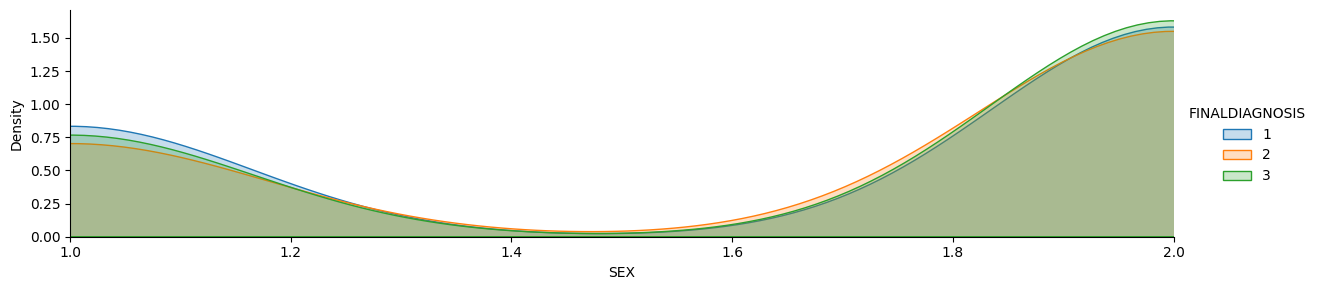

AGE


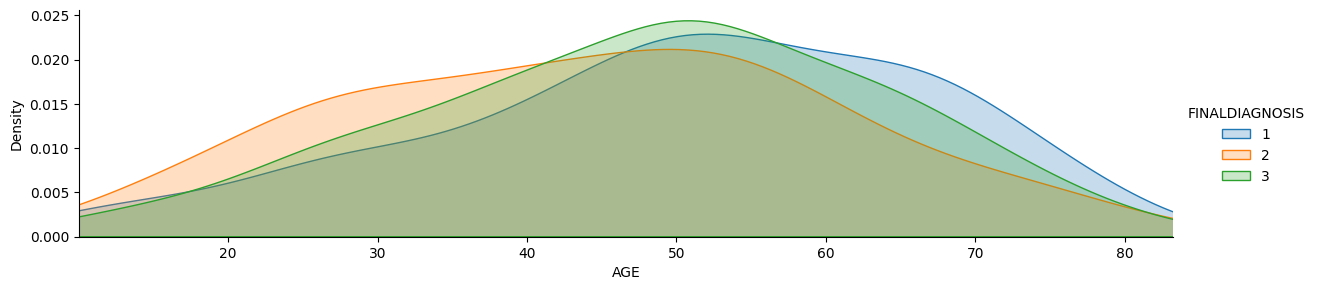

JOB


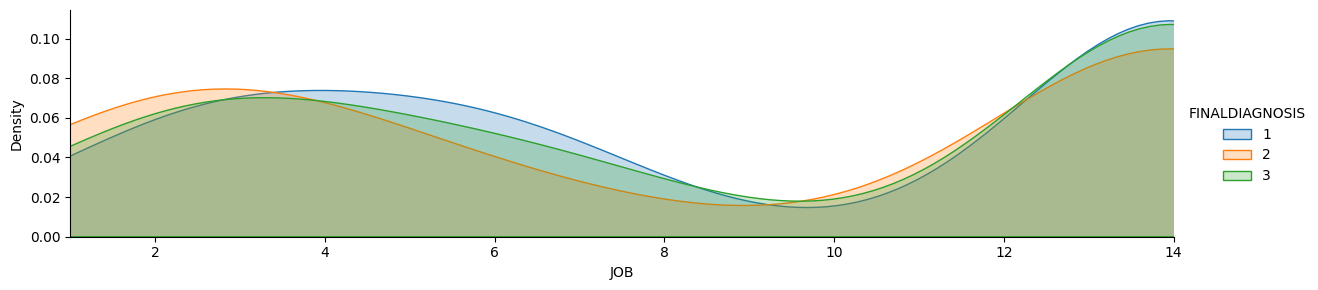

EDUCATION


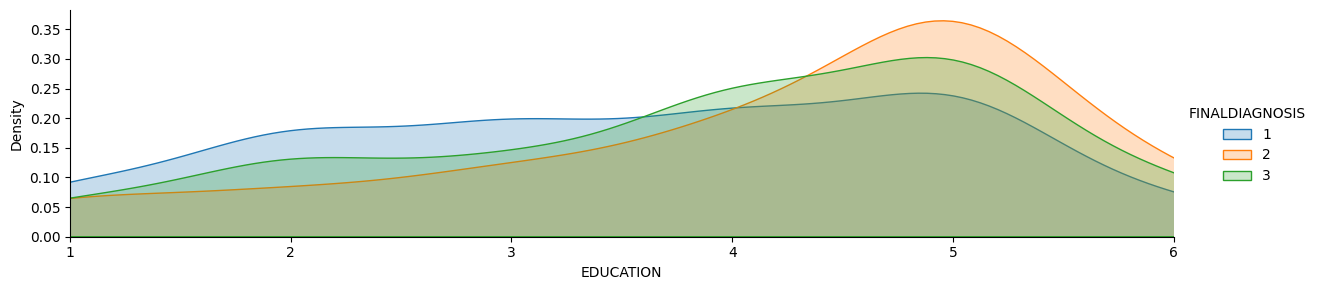

MARRIAGE


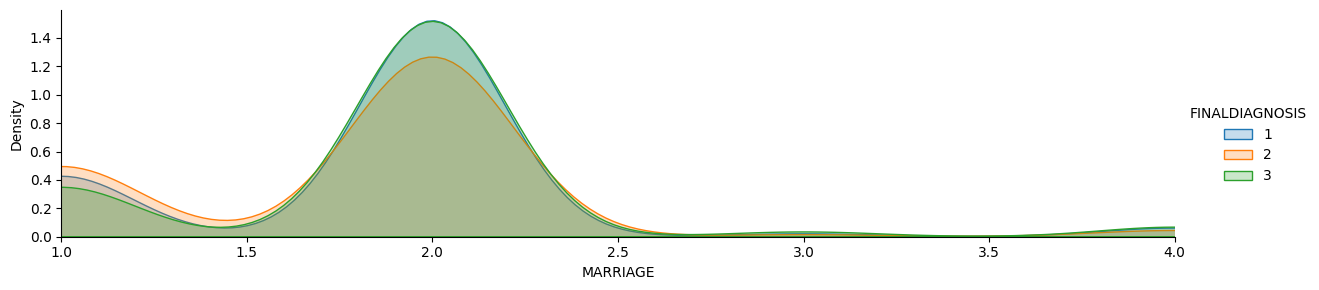

DRINK


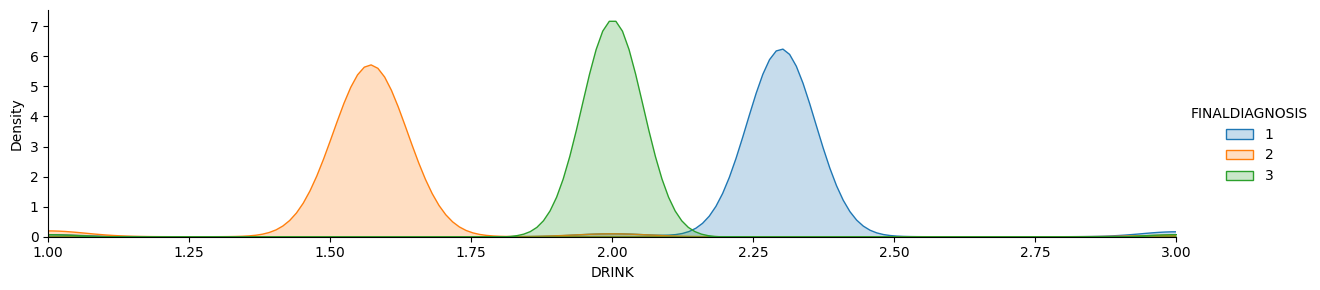

SMOKE


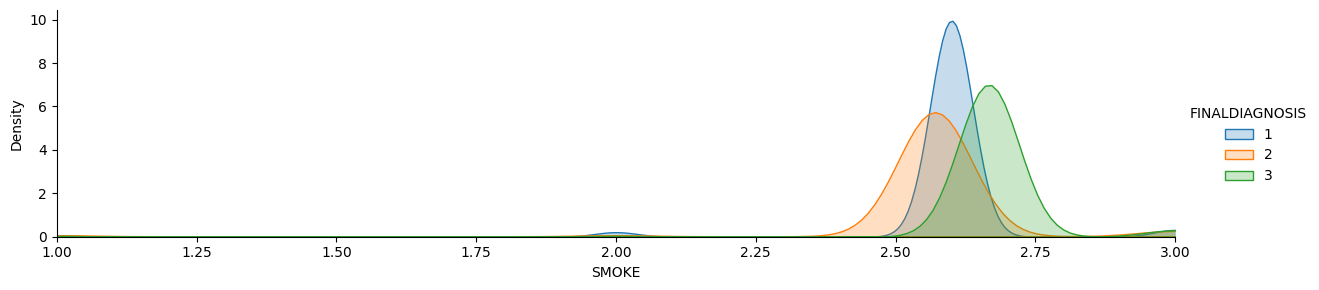

CHARACTER1


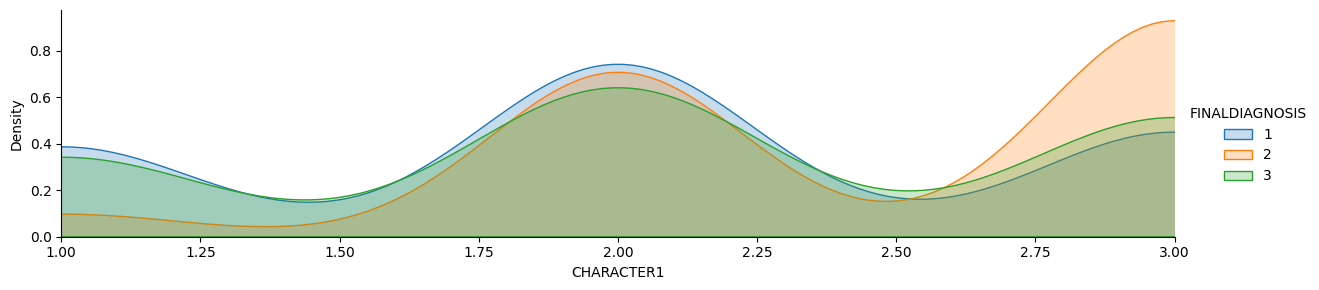

CHARACTER2


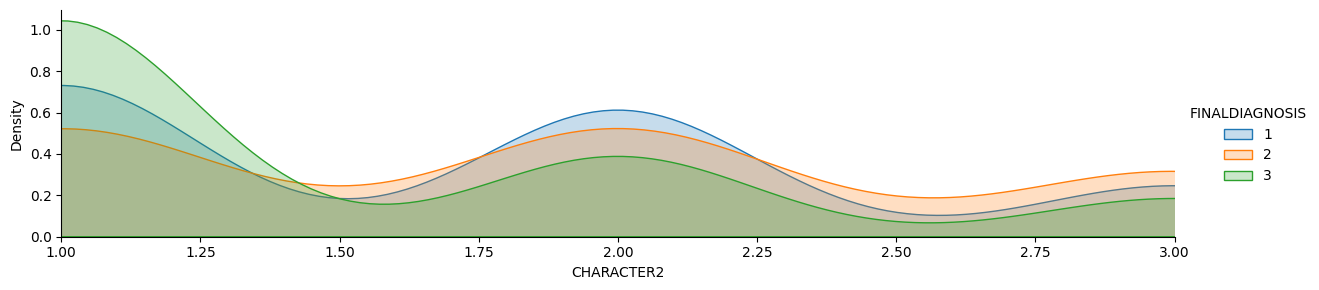

CHARACTER3


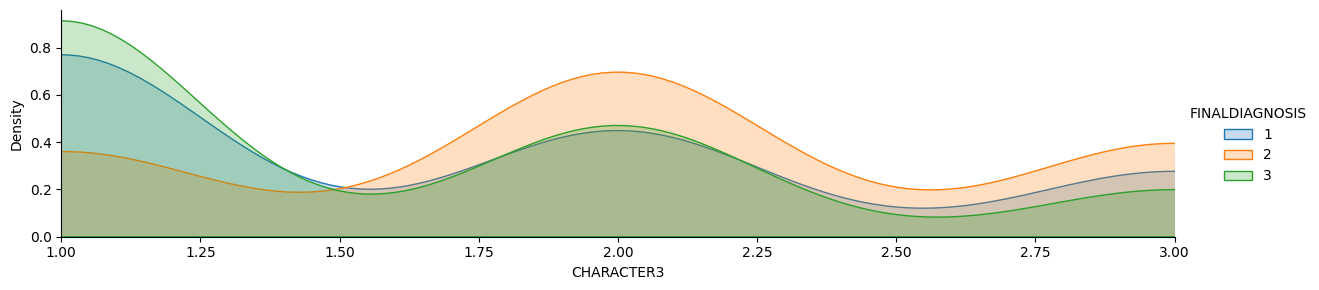

CHARACTER4


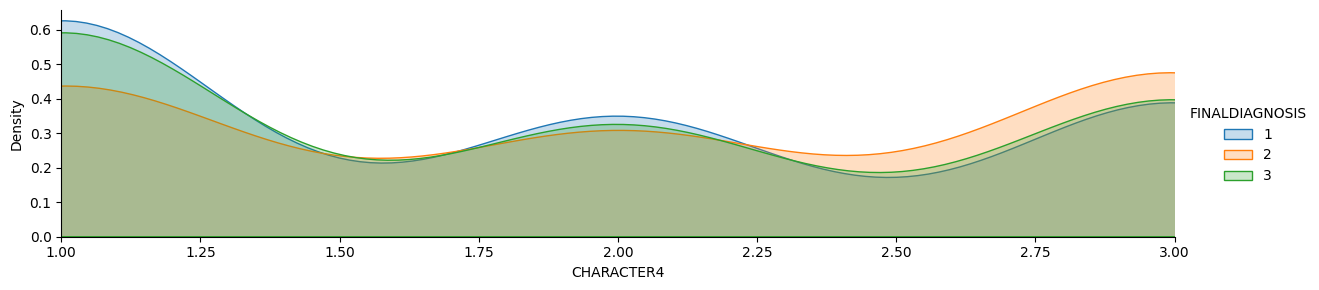

CHARACTER5


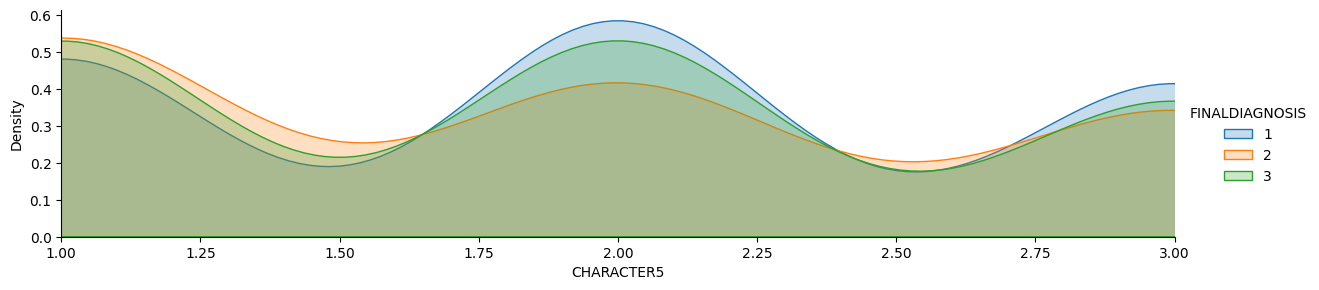

CHARACTER6


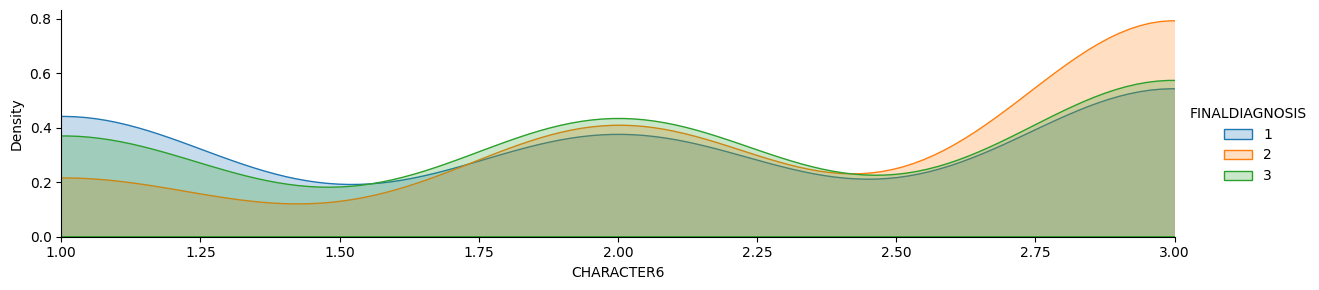

CHARACTER7


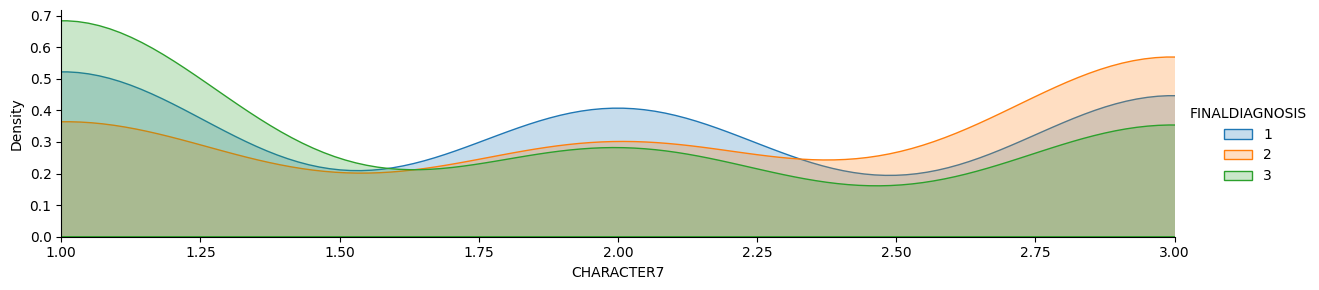

CHARACTER8


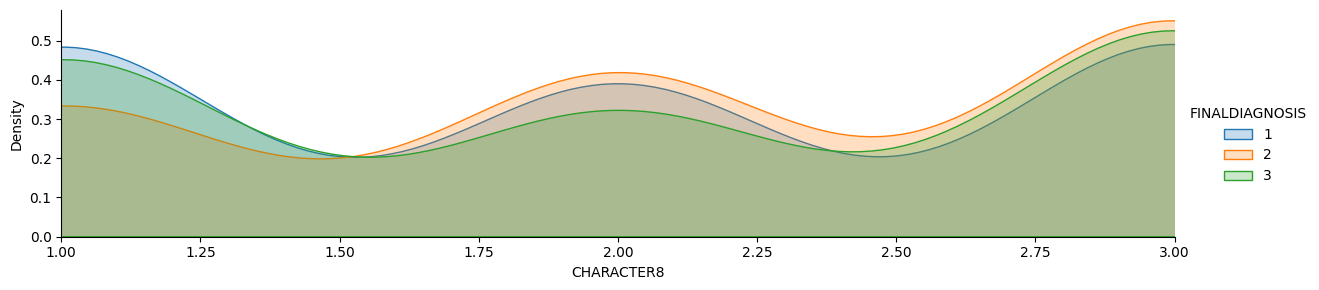

CHARACTER9


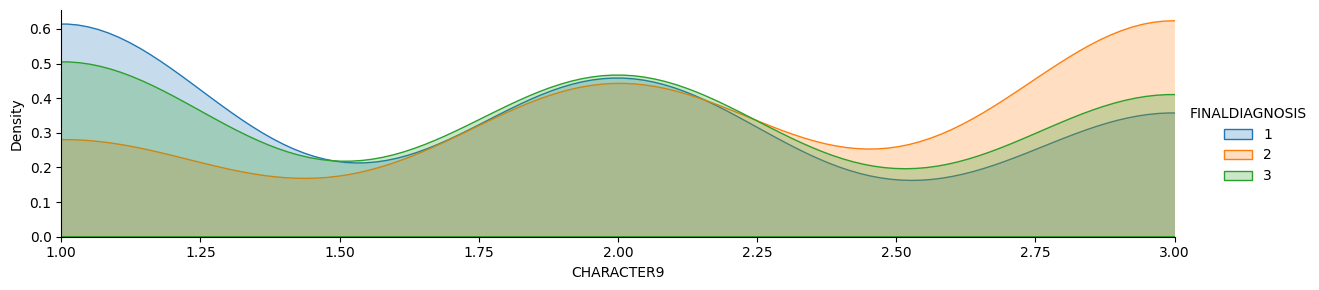

CHARACTER10


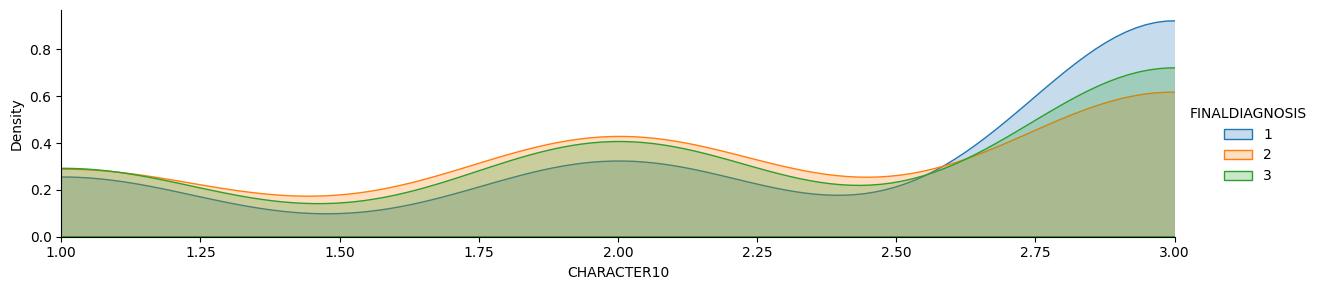

CHARACTER11


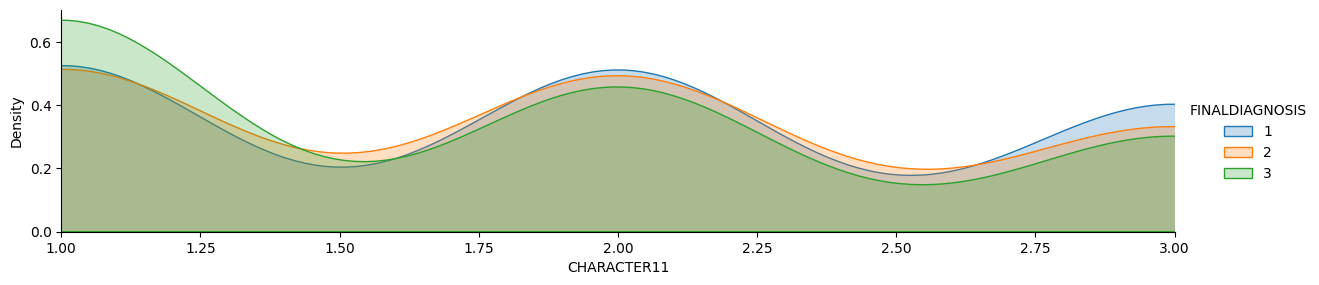

CHARACTER12


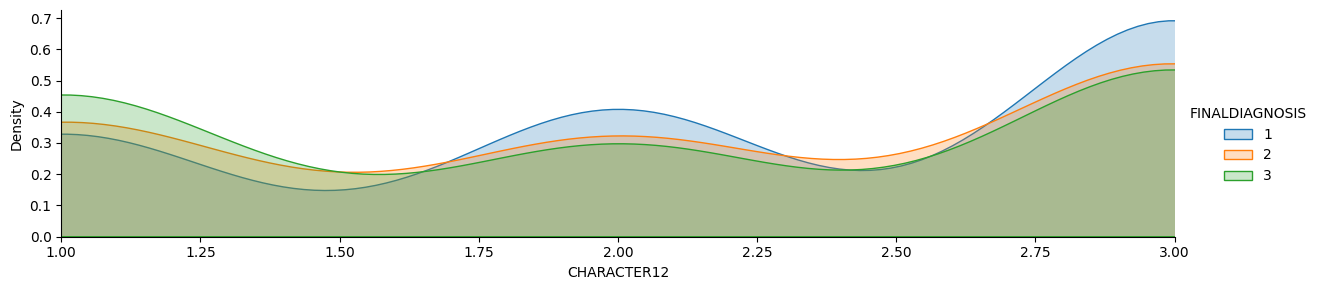

CHARACTER13


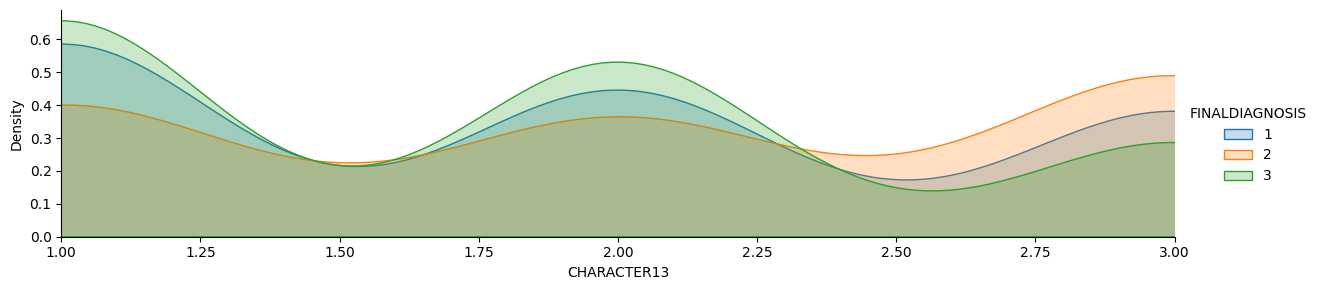

CHARACTER14


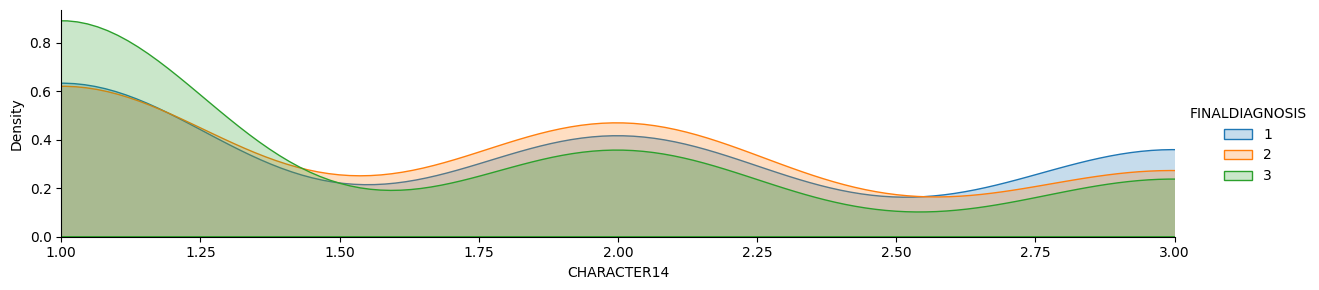

CHARACTER15


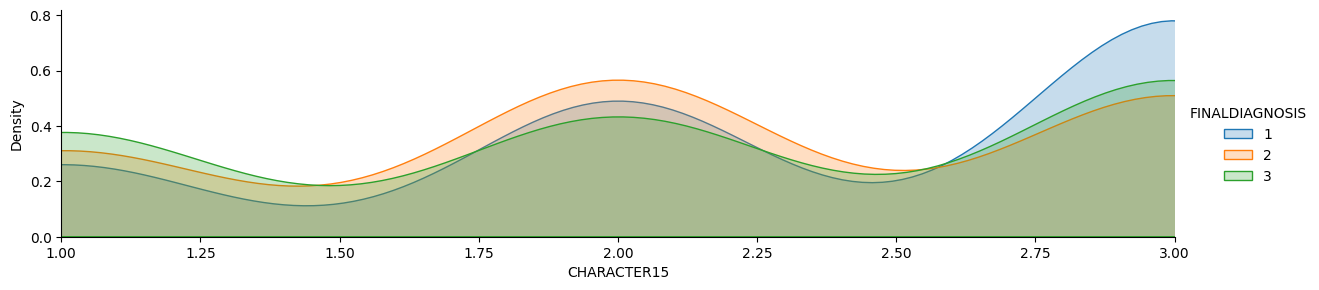

DIET4


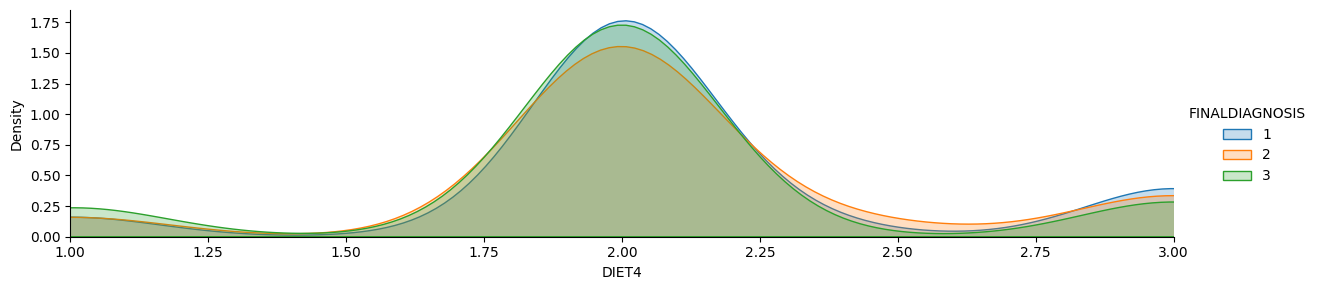

DIET7


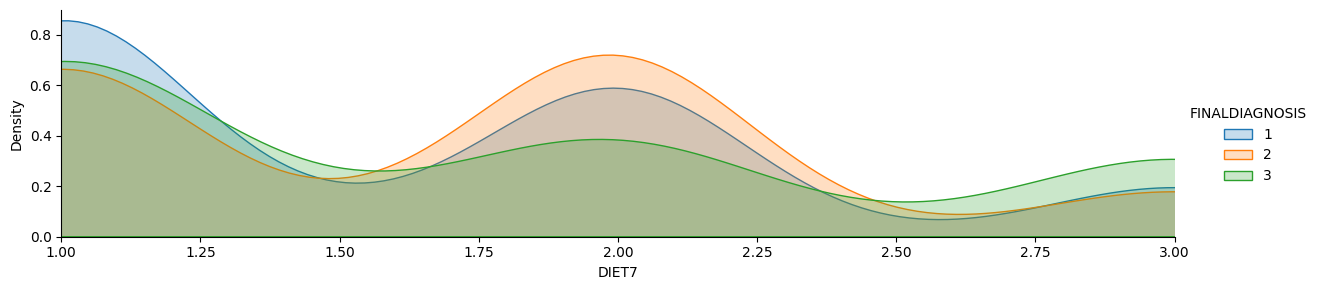

DIGEST1


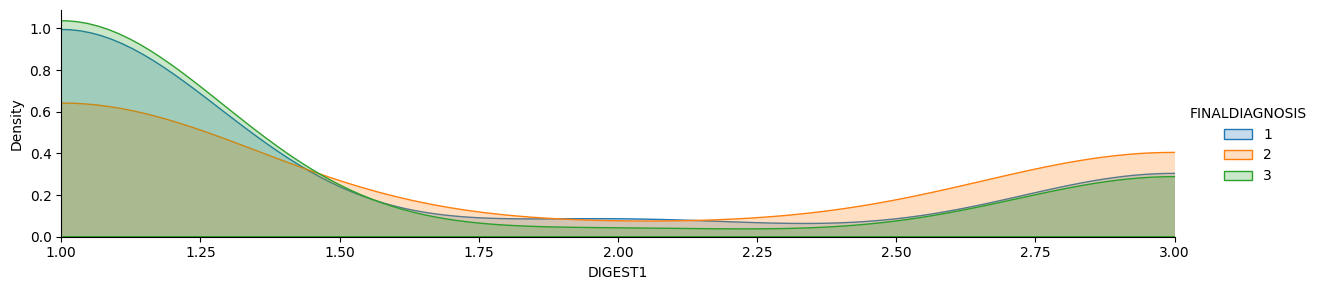

DIGEST3


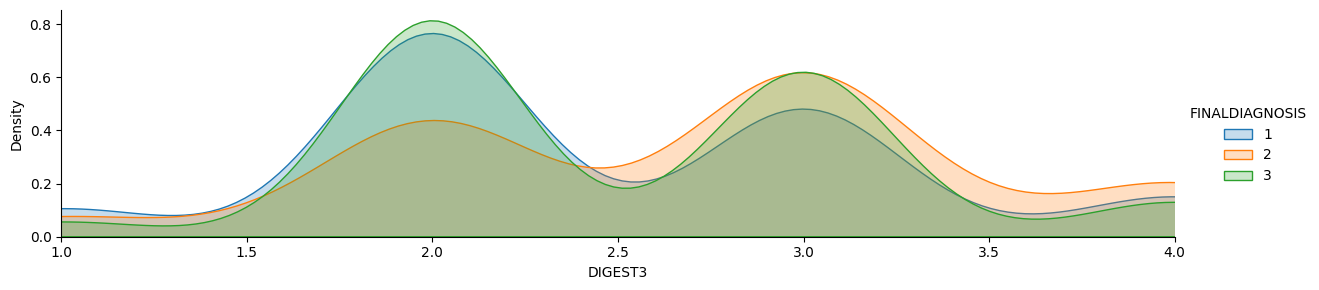

SWEAT1


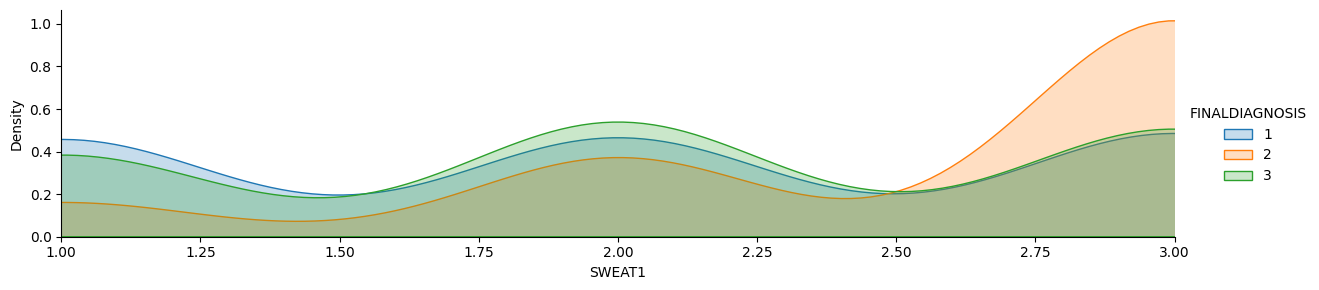

SWEAT3


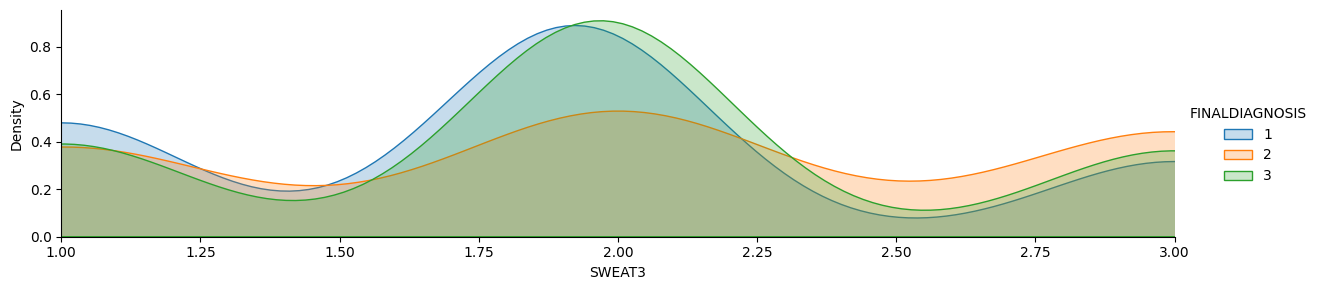

STOOL1


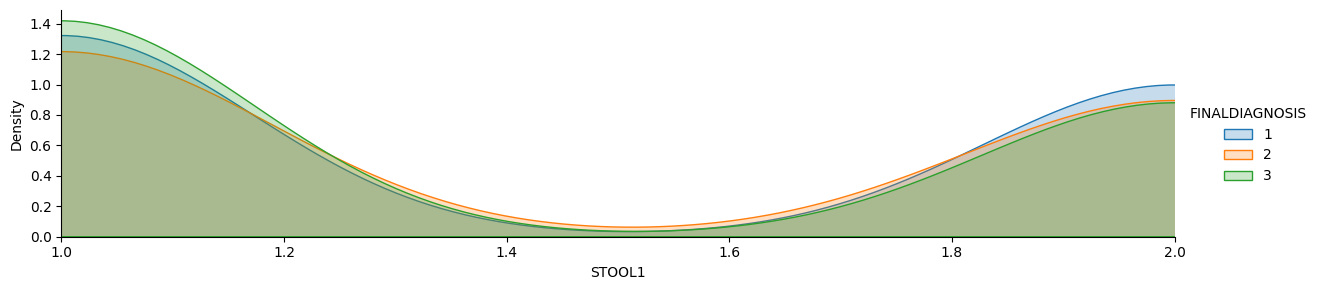

STOOL7


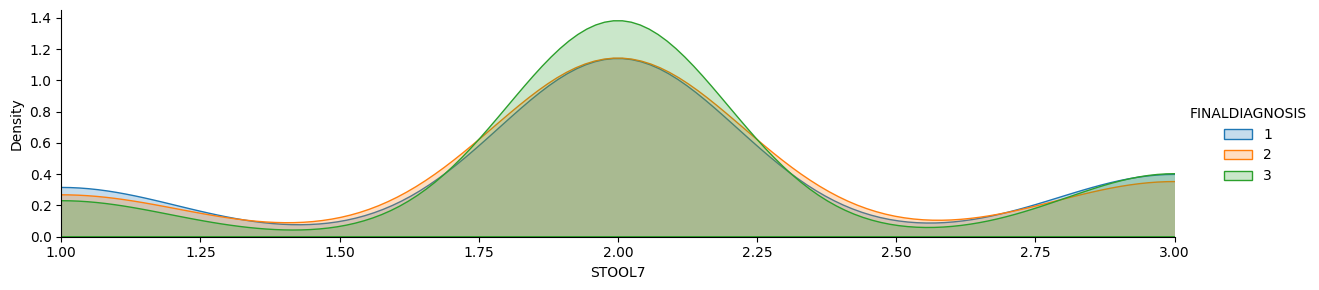

STOOL12_7


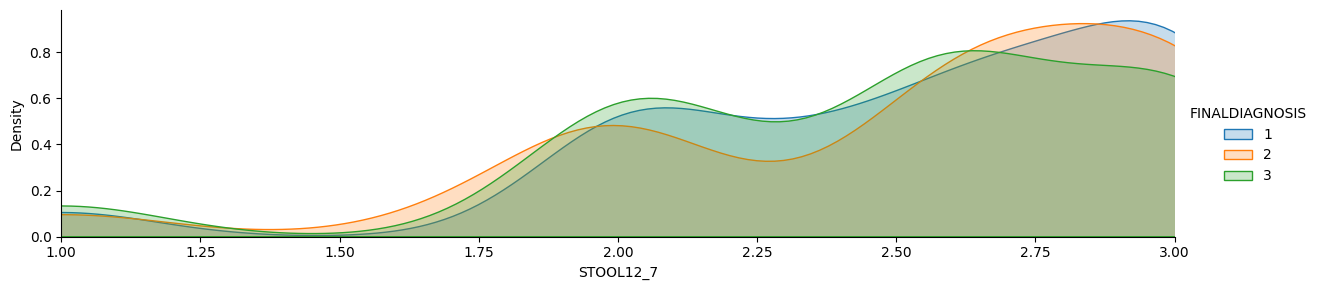

STOOL12_8


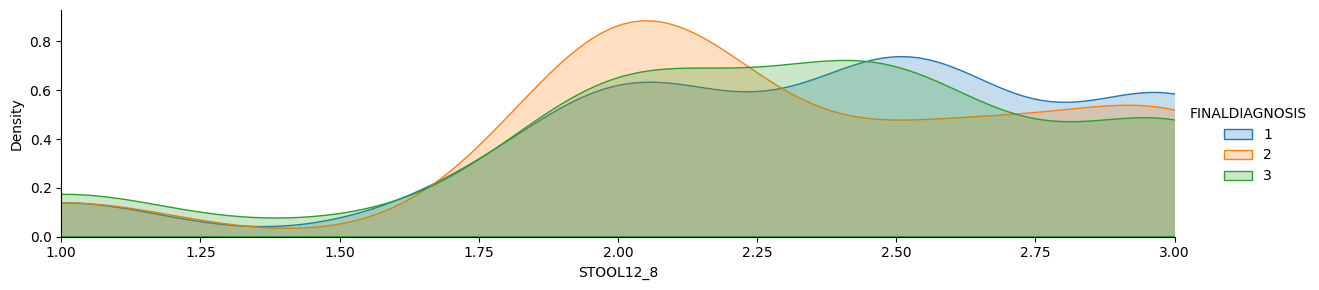

URINE2


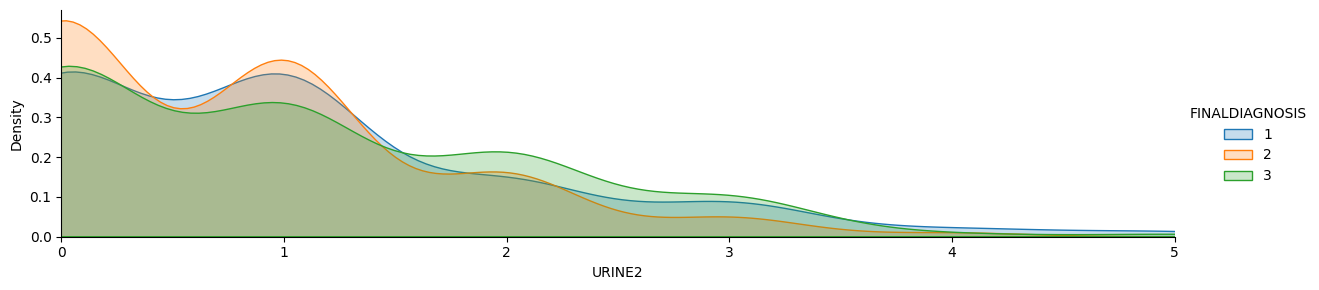

COLDHEAT1


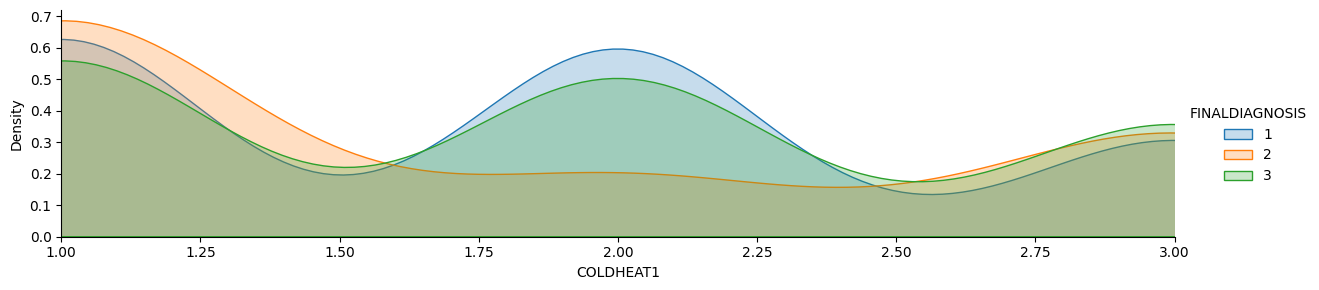

COLDHEAT2


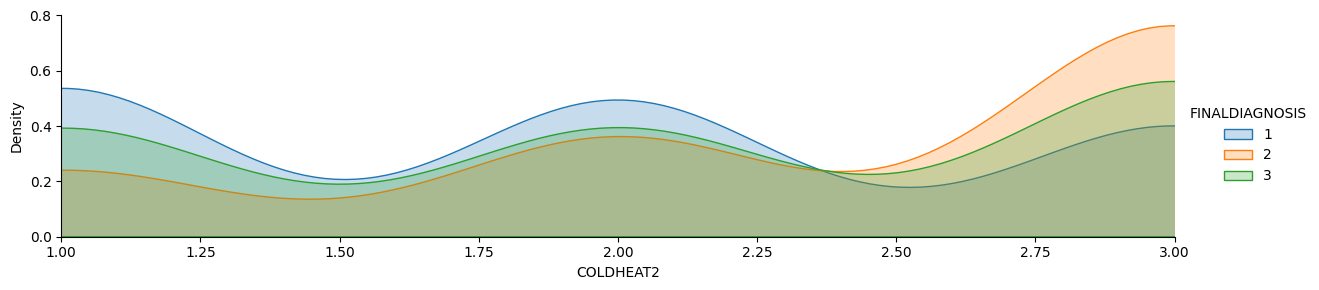

COLDHEAT3


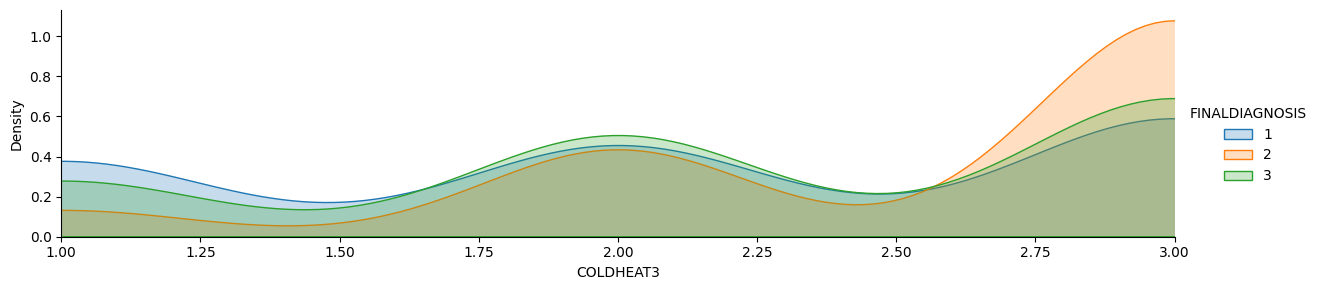

COLDHEAT4


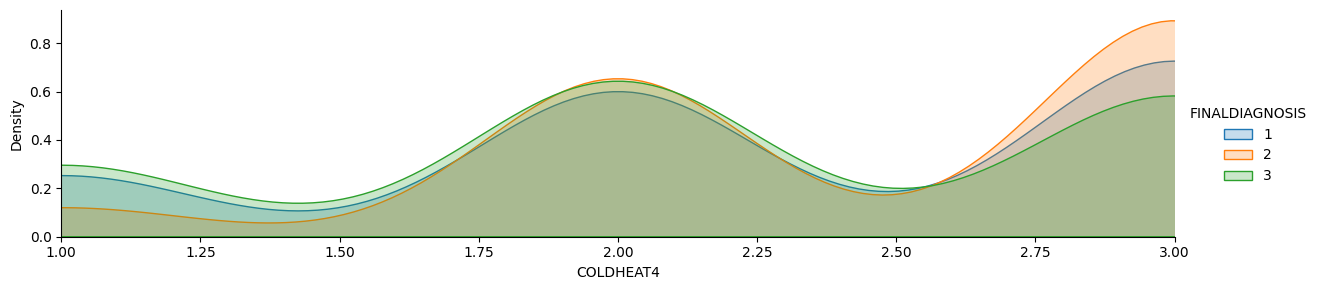

WATER1


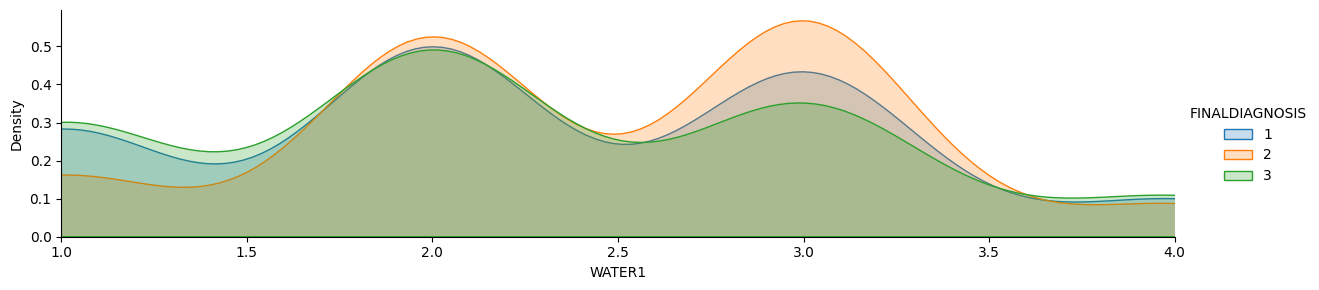

WATER3


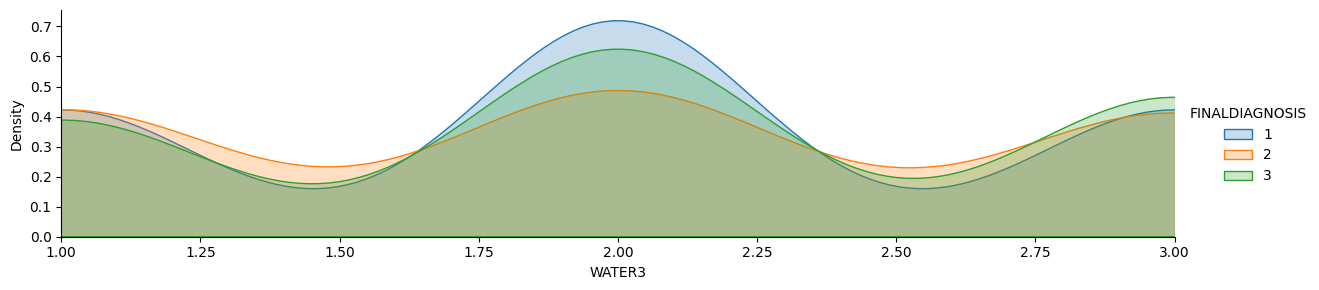

COLDHEAT_S


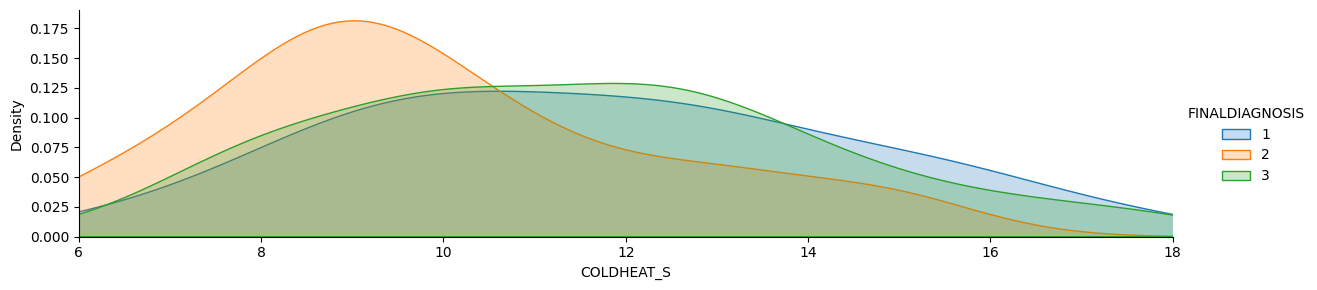

COLDHEAT_G


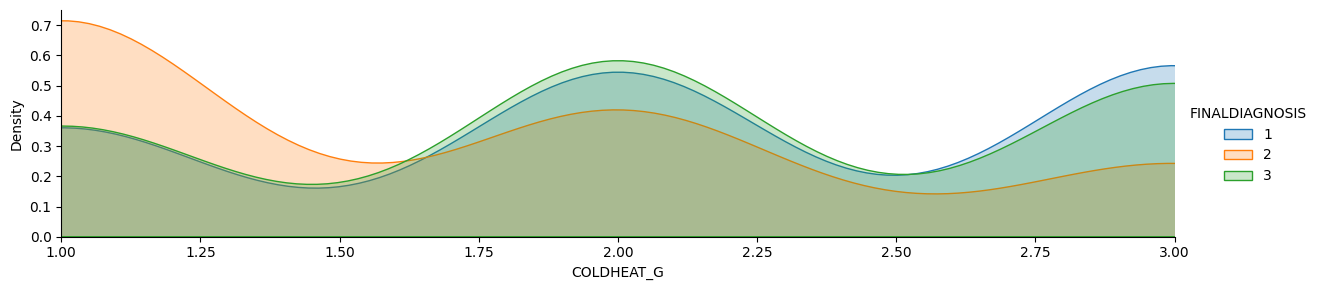

HYPER1


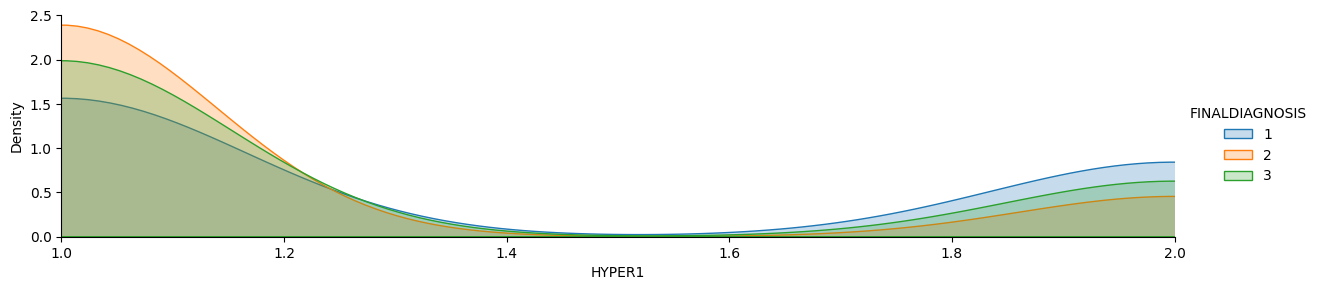

DIABE1


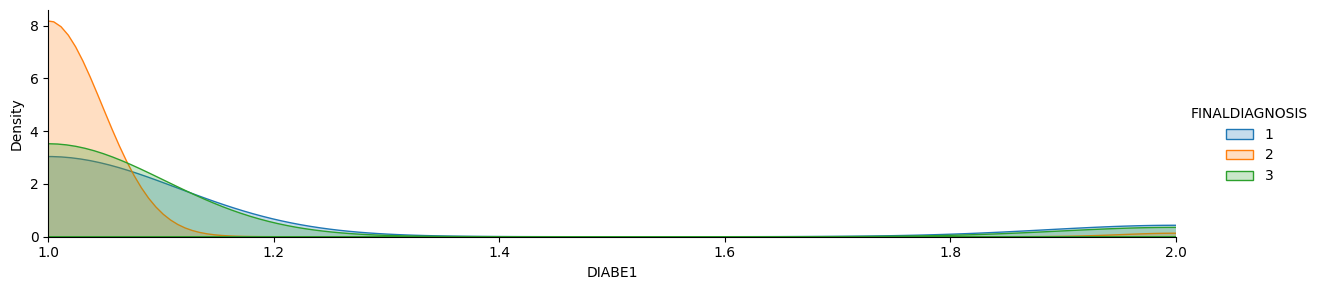

HYPERLI1


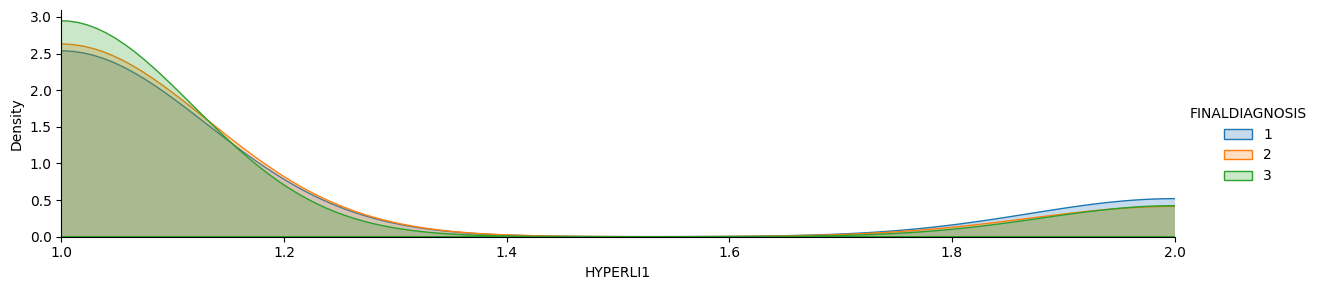

HEALTH1


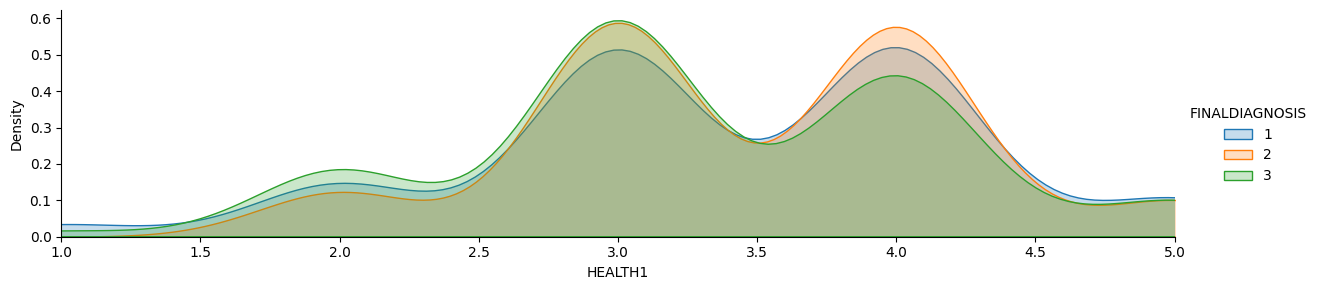

SLEEP3_1


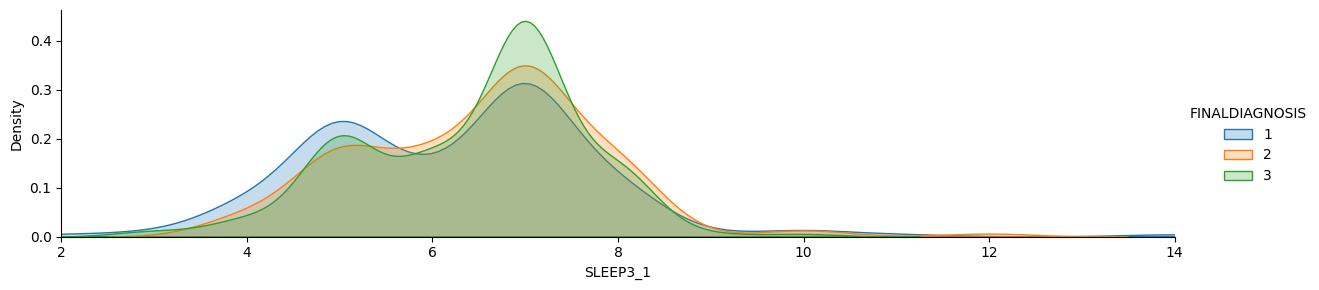

SLEEP3_2


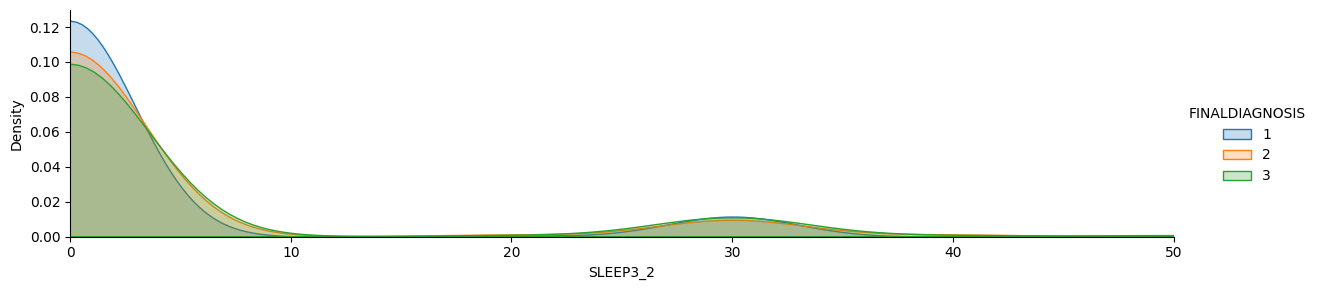

FATIGUE1


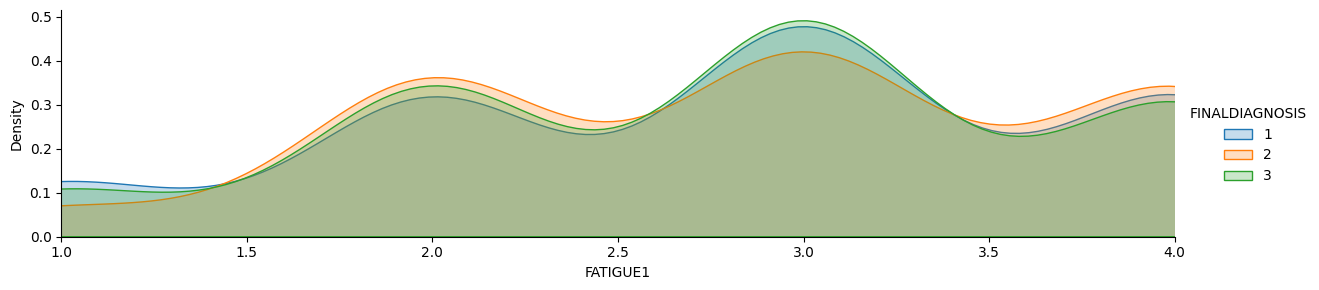

FATIGUE2_1


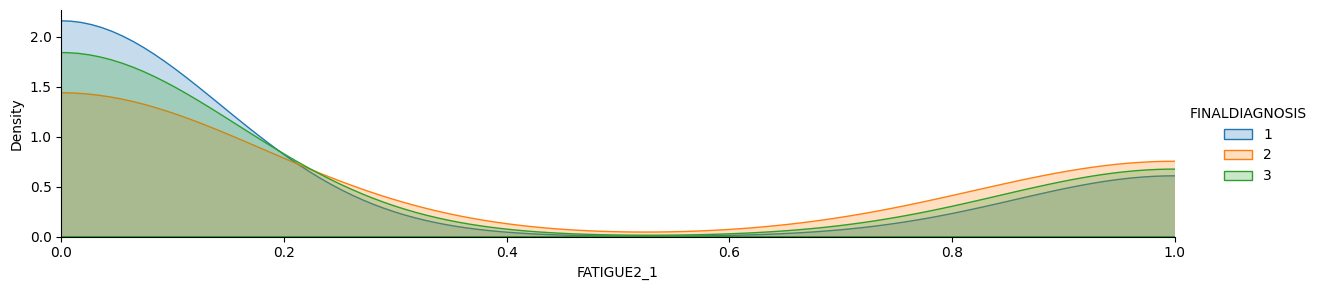

FATIGUE2_2


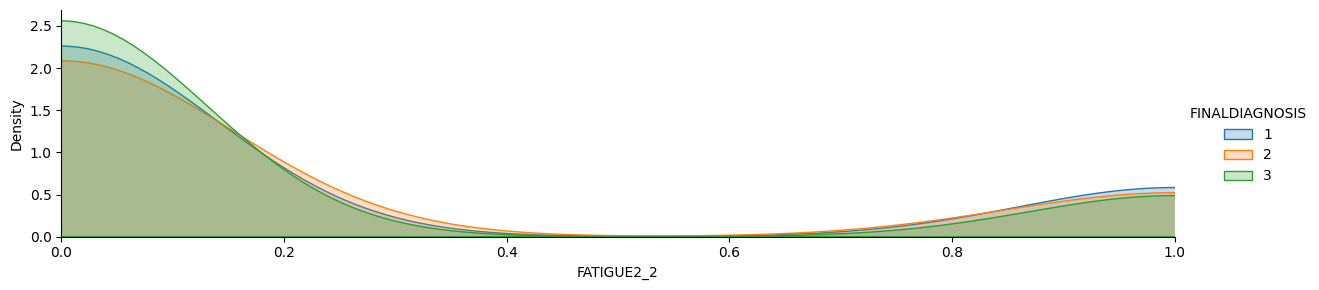

FATIGUE2_3


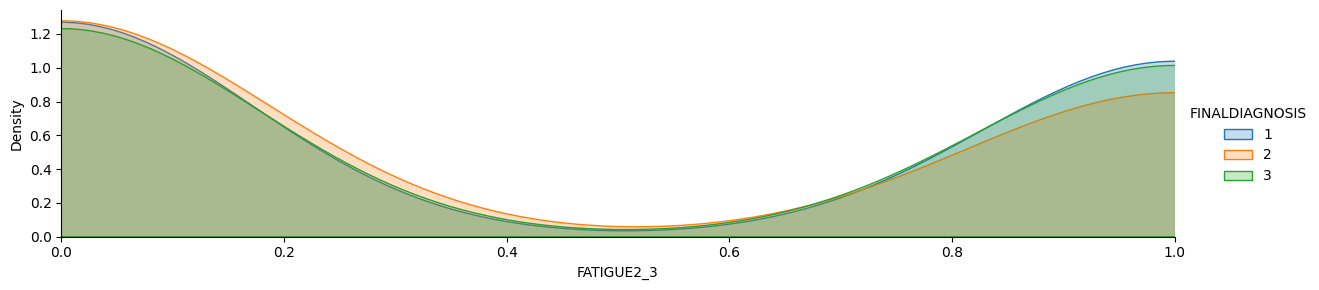

FATIGUE2_4


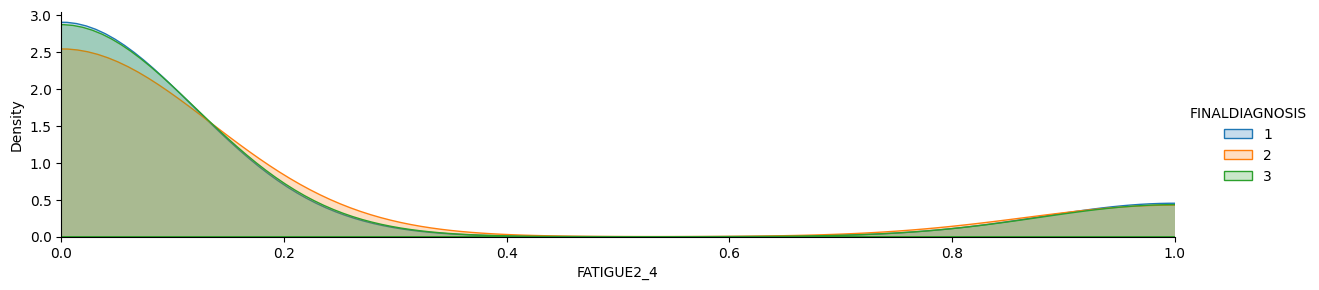

FATIGUE2_5


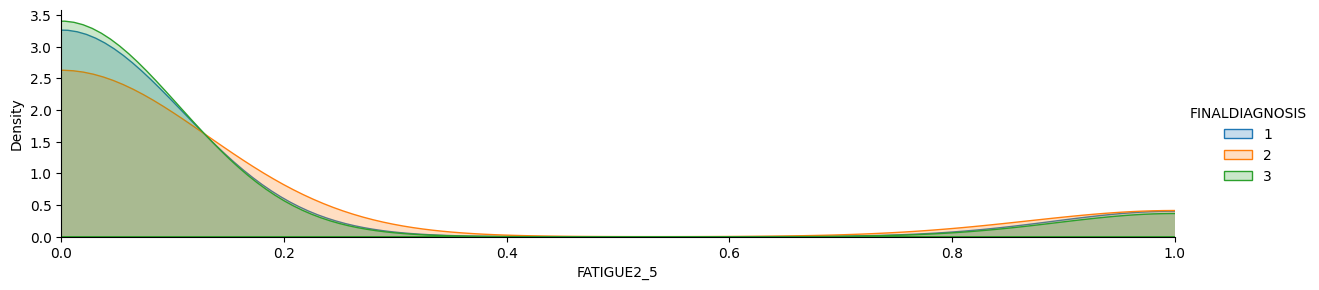

HEIGHT


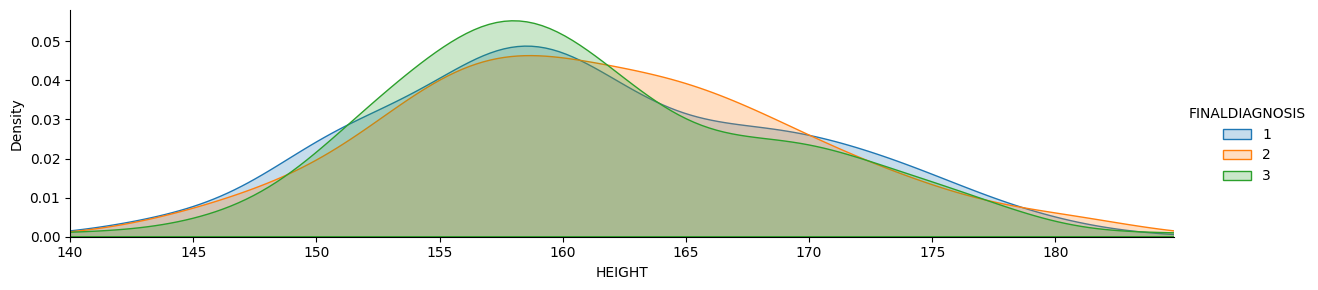

WEIGHT


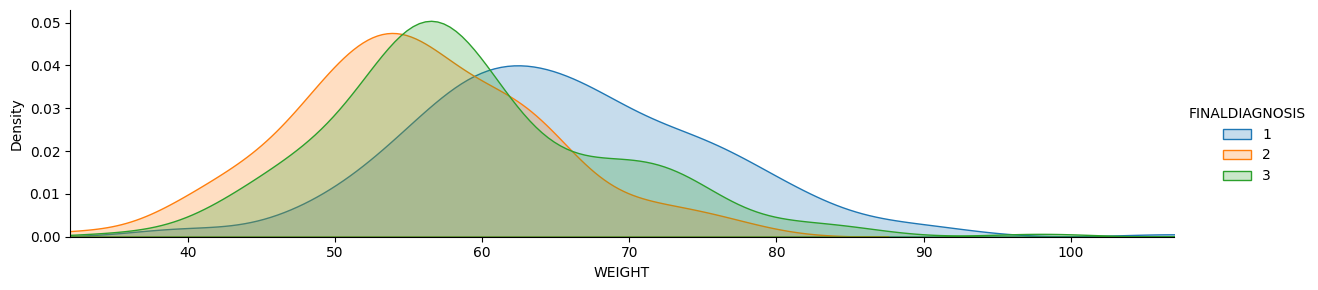

BMI


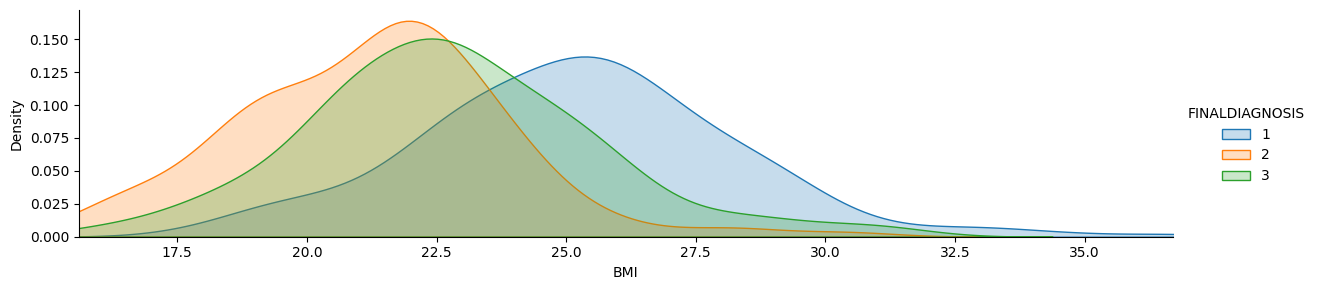

BODYMEAS_8HAND1


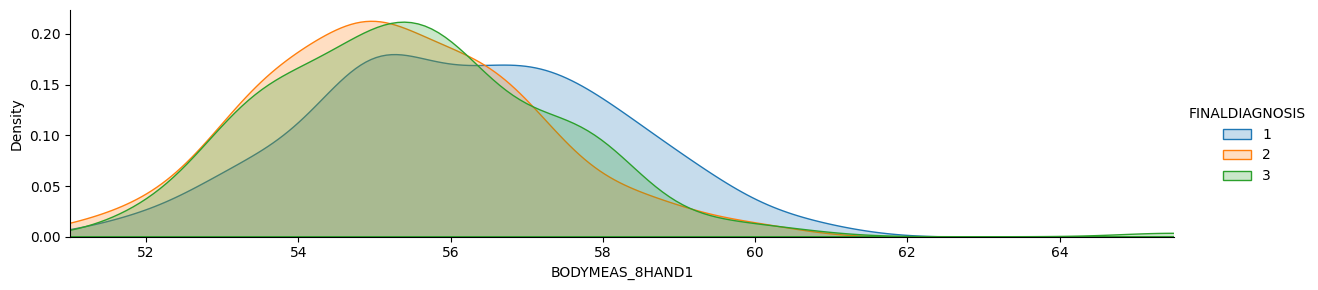

BODYMEAS_8HAND2


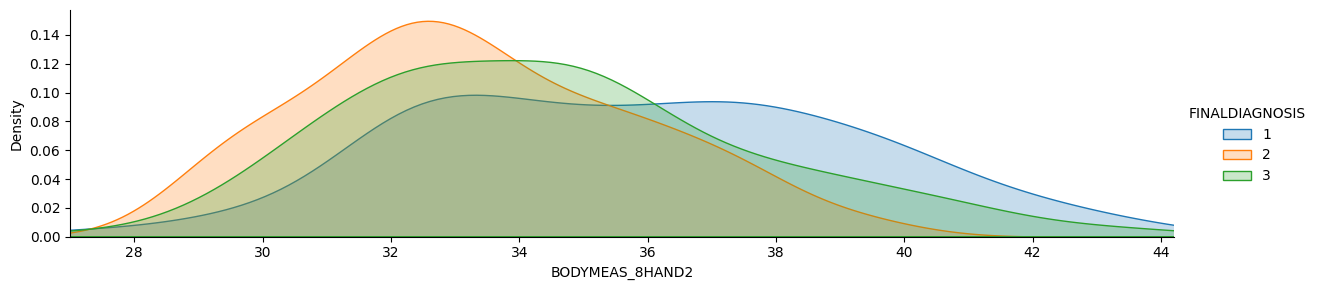

BODYMEAS_8HAND3


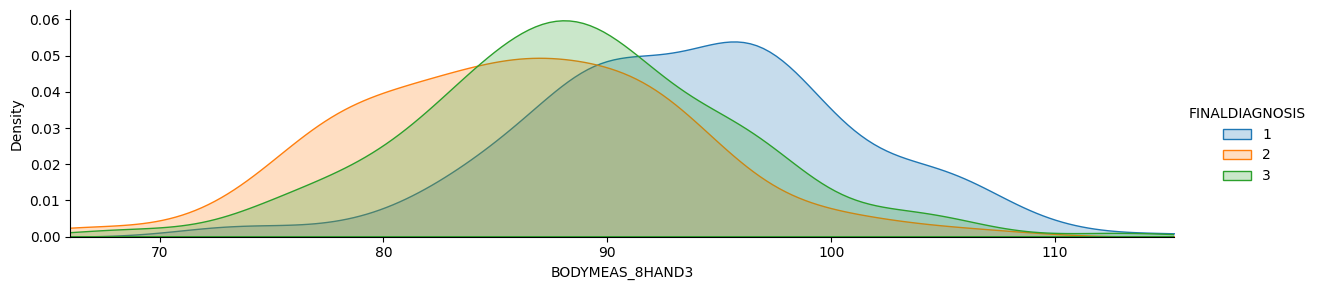

BODYMEAS_8HAND4


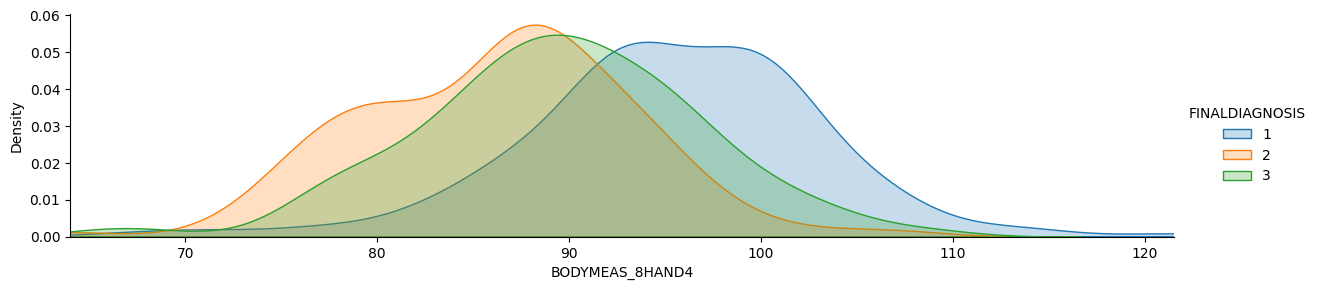

BODYMEAS_8HAND5


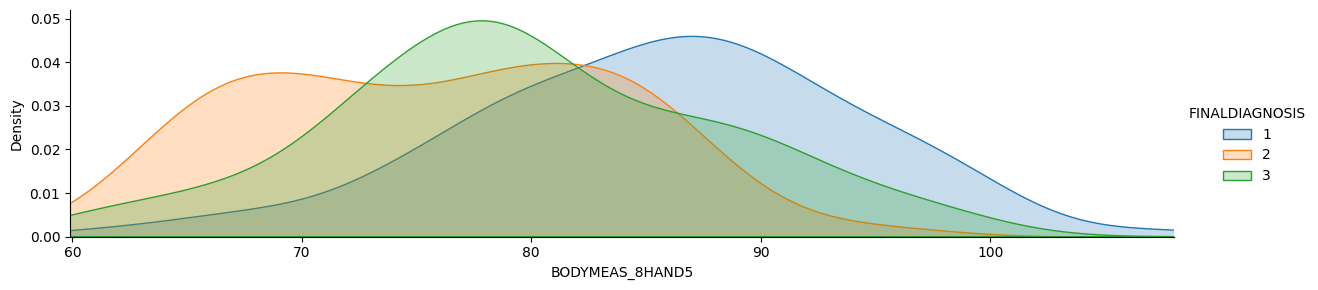

BODYMEAS_8HAND6


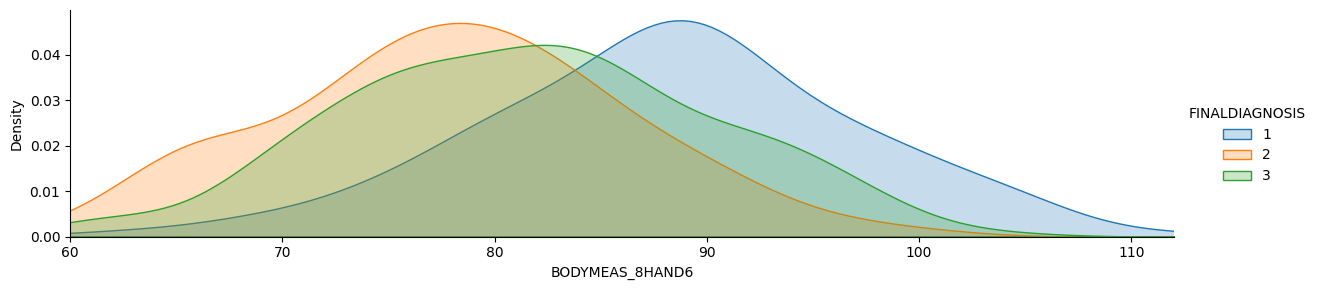

BODYMEAS_8HAND7


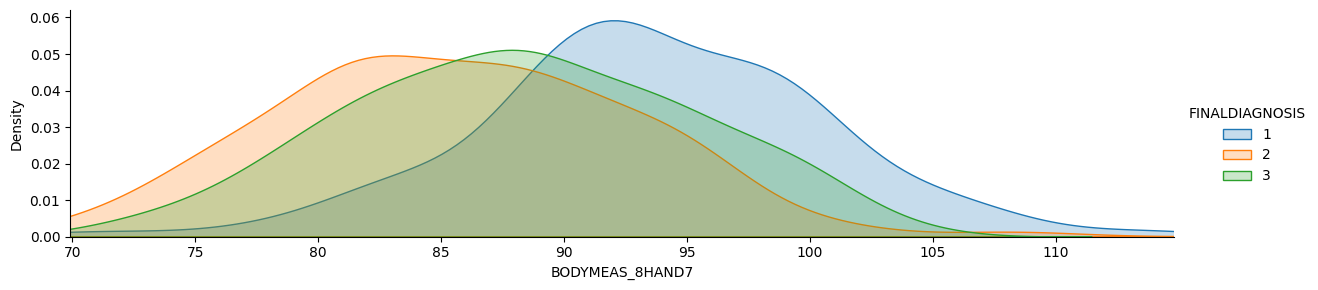

BODYMEAS_8HAND8


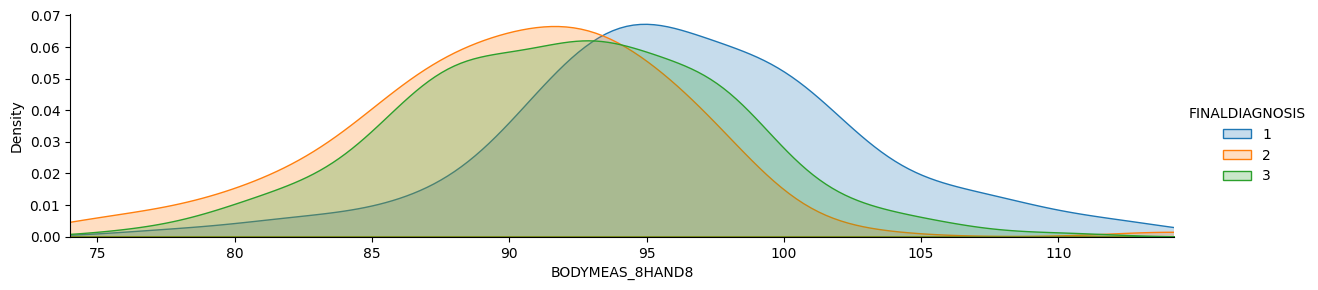

SYSTOLICBP


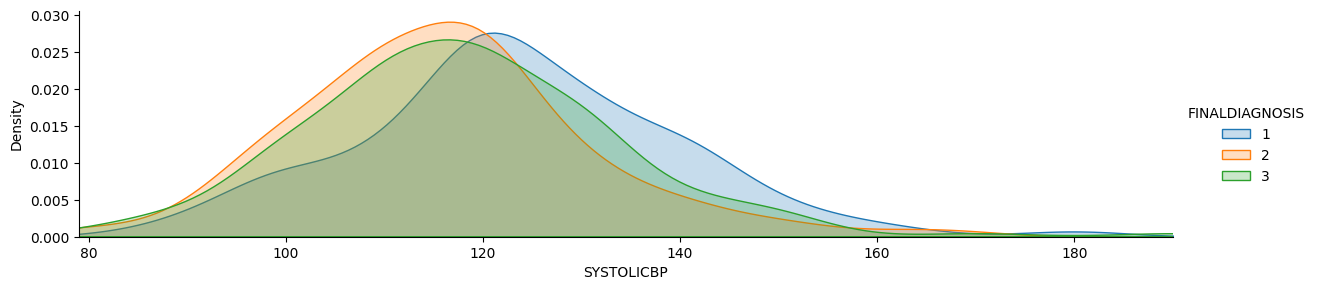

DIASTOLICBP


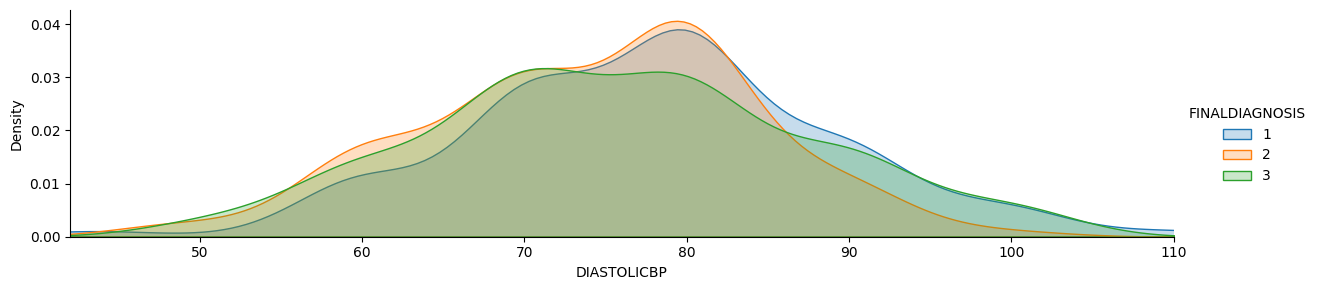

GLUCOSE


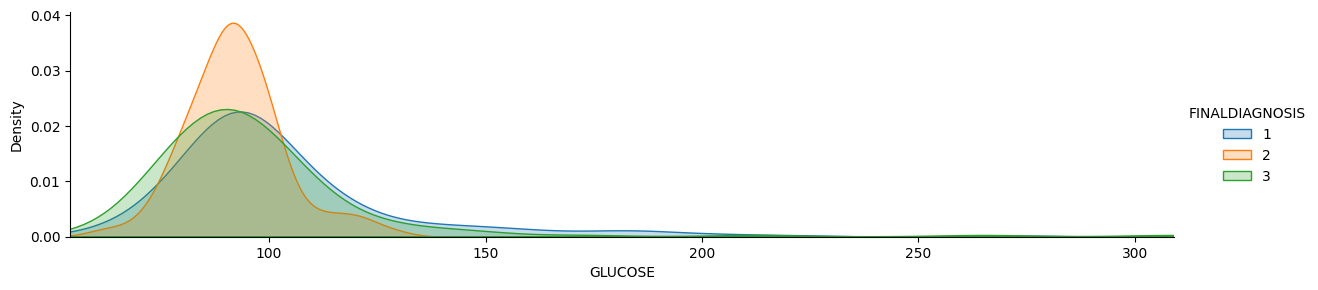

T_CHOL


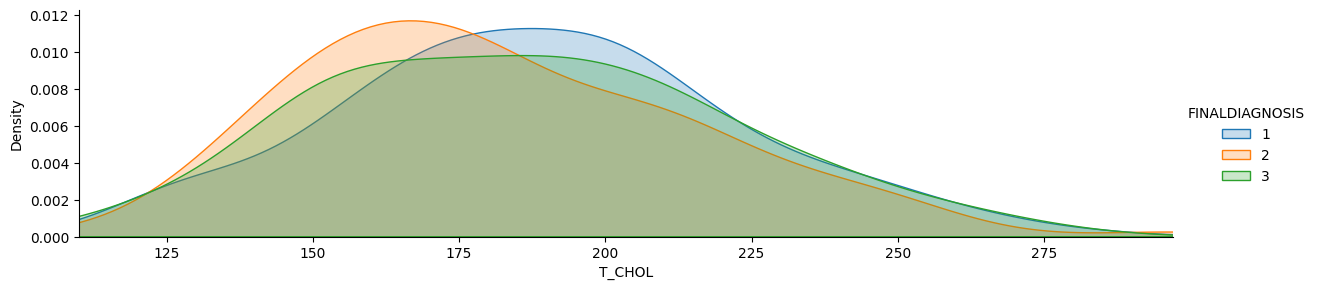

TG


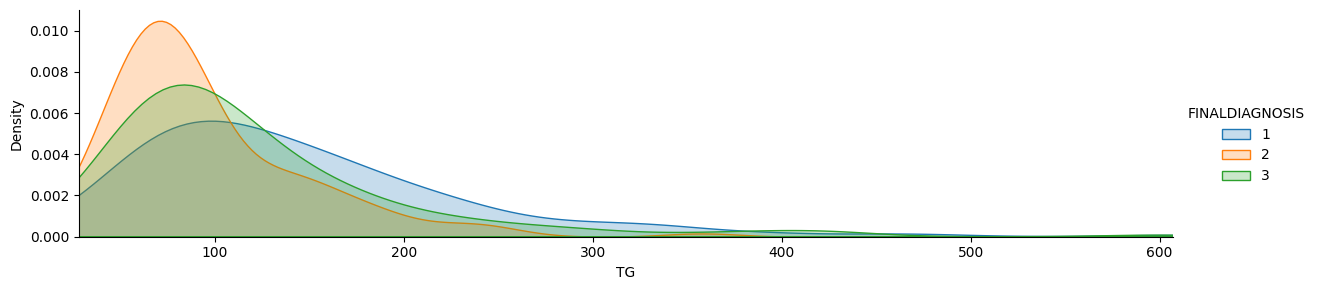

HDL_CHOL


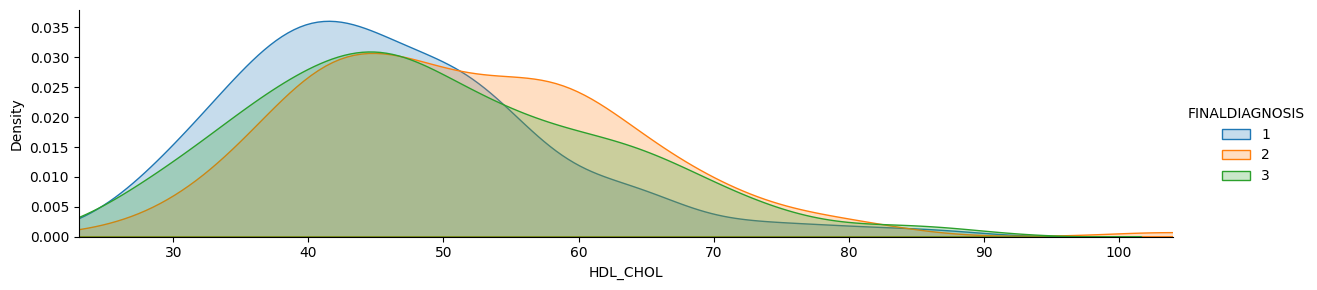

LDL_CHOL


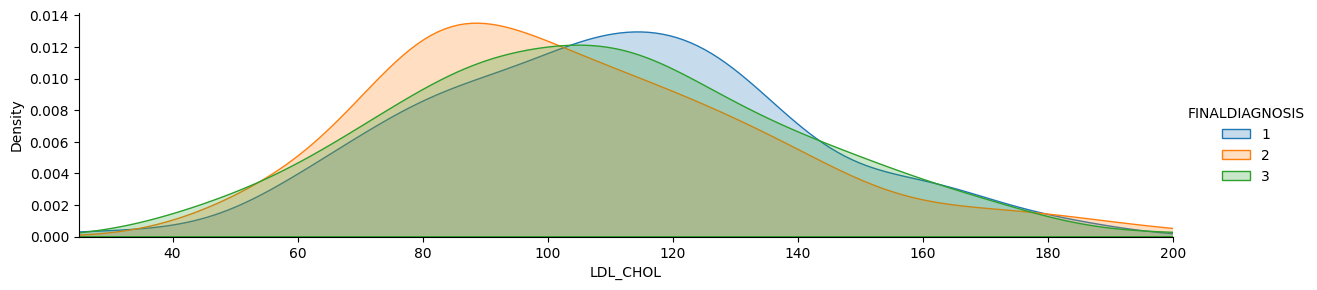

In [47]:
def facetgrid(col):
  facet = sns.FacetGrid(df, hue="FINALDIAGNOSIS", aspect=4)
  facet.map(sns.kdeplot, col, fill=True)
  facet.set(xlim=(df[col].min(), df[col].max()))
  facet.add_legend()
  sns.axes_style("darkgrid")


for col in df.drop('FINALDIAGNOSIS', axis=1).columns:
  print(col)
  facetgrid(col)
  plt.show()

In [48]:
df.to_csv('preprocessed.csv', index=False)

#변수선택

In [49]:
df1 = df[df['FINALDIAGNOSIS'] == 1]
df2 = df[df['FINALDIAGNOSIS'] == 2]
df3 = df[df['FINALDIAGNOSIS'] == 3]

In [50]:
kill = []
for col in df.columns:
    f_statistic, p_value = stats.f_oneway(df1[col], df2[col], df3[col])
    alpha = 0.05  # 유의수준 (보통 0.05 사용)
    if p_value > alpha:
        kill.append(col)
    print(col, p_value)
    print()

SEX 0.7962500816698056

AGE 0.00481787049219638

JOB 0.8315655248193461

EDUCATION 0.0006067527317443644

MARRIAGE 0.17657830123665058

DRINK 3.1614478809958958e-149

SMOKE 1.961093961576228e-08

CHARACTER1 2.0038810090471952e-07

CHARACTER2 3.46726181355854e-05

CHARACTER3 2.2469163386838e-07

CHARACTER4 0.08614151727592653

CHARACTER5 0.46030379597621507

CHARACTER6 0.0013265179841125275

CHARACTER7 0.00015585073111076646

CHARACTER8 0.23889164676220898

CHARACTER9 1.1729135244867135e-05

CHARACTER10 0.058606856575387216

CHARACTER11 0.10443445483653169

CHARACTER12 0.08928562647395136

CHARACTER13 0.0027699837687232406

CHARACTER14 0.008949987309779988

CHARACTER15 0.0195582864247929

DIET4 0.15231193965753878

DIET7 0.24688666917681454

DIGEST1 0.0024285824790997

DIGEST3 0.00792004020026791

SWEAT1 4.642477314841831e-09

SWEAT3 0.0657294796632893

STOOL1 0.6217351084996345

STOOL7 0.7748618007599011

STOOL12_7 0.35464855083892777

STOOL12_8 0.4068264724160394

URINE2 0.08049994958

Each of the input arrays is constant;the F statistic is not defined or infinite


In [53]:
kill

['SEX',
 'JOB',
 'MARRIAGE',
 'CHARACTER4',
 'CHARACTER5',
 'CHARACTER8',
 'CHARACTER10',
 'CHARACTER11',
 'CHARACTER12',
 'DIET4',
 'DIET7',
 'SWEAT3',
 'STOOL1',
 'STOOL7',
 'STOOL12_7',
 'STOOL12_8',
 'URINE2',
 'COLDHEAT1',
 'WATER1',
 'WATER3',
 'HYPERLI1',
 'HEALTH1',
 'SLEEP3_1',
 'SLEEP3_2',
 'FATIGUE1',
 'FATIGUE2_2',
 'FATIGUE2_3',
 'FATIGUE2_4',
 'FATIGUE2_5',
 'HEIGHT',
 'T_CHOL',
 'LDL_CHOL']

In [54]:
selected = df.drop(kill, axis=1)
selected.to_csv('selected.csv', index=False)

In [55]:
selected

AGE  EDUCATION     DRINK     SMOKE  CHARACTER1  CHARACTER2  \
0    48.666          5  1.571429  2.571429           2           2   
1    80.773          3  2.000000  2.666667           1           1   
2    50.008          3  1.571429  2.571429           3           1   
3    50.551          4  1.571429  2.571429           1           1   
4    49.581          2  2.300000  2.600000           3           2   
..      ...        ...       ...       ...         ...         ...   
495  50.682          5  1.000000  2.000000           3           1   
496  42.542          5  2.000000  3.000000           3           1   
497  48.797          5  1.000000  2.000000           3           2   
498  51.263          4  1.000000  1.000000           3           2   
499  53.767          3  3.000000  3.000000           2           1   

     CHARACTER3  CHARACTER6  CHARACTER7  CHARACTER9  ...  BODYMEAS_8HAND4  \
0             1           1         1.0           2  ...             96.0   
1             1           1         1.0           1  ...            101.0   
2             1           1         1.0           1  ...             90.0   
3             1           1         1.0           1  ...            104.0   
4             3           3         2.0           2  ...            102.0   
..          ...         ...         ...         ...  ...              ...   
495           2           2         2.0           2  ...             86.5   
496           3           3         3.0           3  ...             76.0   
497           2           2         3.0           2  ...            104.0   
498           1           1         1.0           1  ...             94.0   
499           1           2         1.0           2  ...             88.3   

     BODYMEAS_8HAND5  BODYMEAS_8HAND6  BODYMEAS_8HAND7  BODYMEAS_8HAND8  \
0               89.0             82.0             91.0             96.0   
1               93.0             92.0             96.0             99.0   
2               83.0             80.0             81.0             81.0   
3               90.0             91.0             94.0             99.0   
4               99.0             98.0             98.0            100.0   
..               ...              ...              ...              ...   
495             83.2             74.5             80.0             88.0   
496             67.0             64.5             76.0             79.0   
497             99.7             95.0             96.5             97.5   
498             87.0             86.0             89.5             91.4   
499             74.5             76.2             87.3             91.0   

     SYSTOLICBP  DIASTOLICBP  GLUCOSE     TG  HDL_CHOL  
0           120           80    104.0   72.0      60.0  
1           124           65    110.0   97.0      46.0  
2           121           75     79.0   88.0      49.0  
3           113           81    100.0  136.0      44.0  
4           129           72     92.0   61.0      33.0  
..          ...          ...      ...    ...       ...  
495         120           80     71.0   75.0      73.0  
496         110           70     74.0   86.0     104.0  
497         150          100    125.0  220.0      74.0  
498         110           80     85.0  127.0      49.0  
499         120           80     84.0  157.0      84.0  

[500 rows x 40 columns]

#experiment

##models

In [96]:
X = df.drop(['FINALDIAGNOSIS'], axis=1)
y = df['FINALDIAGNOSIS']

In [97]:
y=y.map({1:0, 2:1, 3:2})

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2023)

In [99]:
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [100]:
y_train.value_counts()

FINALDIAGNOSIS
0    152
2    146
1    102
Name: count, dtype: int64

In [102]:
x_shuffled = sklearn.utils.shuffle(X_train, random_state=312)
y_shuffled = sklearn.utils.shuffle(y_train, random_state=312)

smote = SMOTE(random_state=312)
X_train, y_train = smote.fit_resample(x_shuffled, y_shuffled)

In [103]:
y_train.value_counts()

FINALDIAGNOSIS
2    152
0    152
1    152
Name: count, dtype: int64

In [93]:
r = 2023
classifiers = {"SVC":SVC(),
               "DTC":DecisionTreeClassifier(random_state=r) ,
               "RFC":RandomForestClassifier(random_state=r) ,
               "GNB":GaussianNB(),
               "MLP":MLPClassifier(random_state=r, max_iter=500),
               "XGB":XGBClassifier(random_state=r),
               'ETC': ExtraTreesClassifier(random_state=r)}

for name in classifiers:
    score = cross_val_score(classifiers[name], X_train, y_train, cv=5, scoring='f1_macro').mean()
    print(name, score.round(4))

SVC 0.424
DTC 0.9735
RFC 0.9848
GNB 0.6351
MLP 0.5259
XGB 0.9826
ETC 0.9582


In [94]:
X_train = X_train.drop(['DRINK', 'SMOKE'], axis=1)
X_test = X_test.drop(['DRINK', 'SMOKE'], axis=1)

In [95]:
r = 2023
classifiers = {"SVC":SVC(),
               "DTC":DecisionTreeClassifier(random_state=r) ,
               "RFC":RandomForestClassifier(random_state=r) ,
               "GNB":GaussianNB(),
               "MLP":MLPClassifier(random_state=r, max_iter=500),
               "XGB":XGBClassifier(random_state=r),
               'ETC': ExtraTreesClassifier(random_state=r)}

for name in classifiers:
    score = cross_val_score(classifiers[name], X_train, y_train, cv=5, scoring='f1_macro').mean()
    print(name, score.round(4))

SVC 0.4259
DTC 0.6167
RFC 0.7071
GNB 0.521
MLP 0.5041
XGB 0.8054
ETC 0.6532


In [86]:
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

##Grid search

In [57]:
pipe = make_pipeline(XGBClassifier(random_state=r))
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'xgbclassifier', 'xgbclassifier__objective', 'xgbclassifier__use_label_encoder', 'xgbclassifier__base_score', 'xgbclassifier__booster', 'xgbclassifier__callbacks', 'xgbclassifier__colsample_bylevel', 'xgbclassifier__colsample_bynode', 'xgbclassifier__colsample_bytree', 'xgbclassifier__early_stopping_rounds', 'xgbclassifier__enable_categorical', 'xgbclassifier__eval_metric', 'xgbclassifier__gamma', 'xgbclassifier__gpu_id', 'xgbclassifier__grow_policy', 'xgbclassifier__importance_type', 'xgbclassifier__interaction_constraints', 'xgbclassifier__learning_rate', 'xgbclassifier__max_bin', 'xgbclassifier__max_cat_to_onehot', 'xgbclassifier__max_delta_step', 'xgbclassifier__max_depth', 'xgbclassifier__max_leaves', 'xgbclassifier__min_child_weight', 'xgbclassifier__missing', 'xgbclassifier__monotone_constraints', 'xgbclassifier__n_estimators', 'xgbclassifier__n_jobs', 'xgbclassifier__num_parallel_tree', 'xgbclassifier__predictor', 'xgbclassifier__random_

In [58]:
param_grid = [{'xgbclassifier__max_depth': [None, 3, 6, 9, 12],
               'xgbclassifier__min_child_weight': [1, 3, 5, 7, 10],
               'xgbclassifier__n_estimators': [50, 100, 150, 200]
               }]

gs = GridSearchCV(estimator = pipe,
                 param_grid = param_grid,
                 scoring = 'f1_macro',
                 cv=10,
                 n_jobs= -1, error_score='raise', verbose=3)

gs = gs.fit(X_train, y_train)

print(gs.best_score_)
print(gs.best_params_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV 4/10] END xgbclassifier__max_depth=None, xgbclassifier__min_child_weight=1, xgbclassifier__n_estimators=50;, score=0.651 total time=   0.3s
[CV 1/10] END xgbclassifier__max_depth=None, xgbclassifier__min_child_weight=1, xgbclassifier__n_estimators=100;, score=0.846 total time=   0.5s
[CV 7/10] END xgbclassifier__max_depth=None, xgbclassifier__min_child_weight=1, xgbclassifier__n_estimators=100;, score=0.869 total time=   0.5s
[CV 3/10] END xgbclassifier__max_depth=None, xgbclassifier__min_child_weight=1, xgbclassifier__n_estimators=150;, score=0.871 total time=   0.7s
[CV 10/10] END xgbclassifier__max_depth=None, xgbclassifier__min_child_weight=1, xgbclassifier__n_estimators=150;, score=0.864 total time=   0.7s
[CV 6/10] END xgbclassifier__max_depth=None, xgbclassifier__min_child_weight=1, xgbclassifier__n_estimators=200;, score=0.734 total time=   0.8s
[CV 2/10] END xgbclassifier__max_depth=None, xgbclassifier__min_c

##best model

In [59]:
model = XGBClassifier(max_depth=None, min_child_weight=3, n_estimators=150, random_state=0)
score = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_macro').mean()
print(score.round(4))

0.8296


In [60]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [61]:
model.save_model("model.json")

In [62]:
print('정확도 accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('정밀도 precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, average='macro'))
print('재현율 recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, average='macro'))
print('F1-score: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, average='macro'))

정확도 accuracy: 0.740
정밀도 precision: 0.737
재현율 recall: 0.718
F1-score: 0.725


##Shap

In [63]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

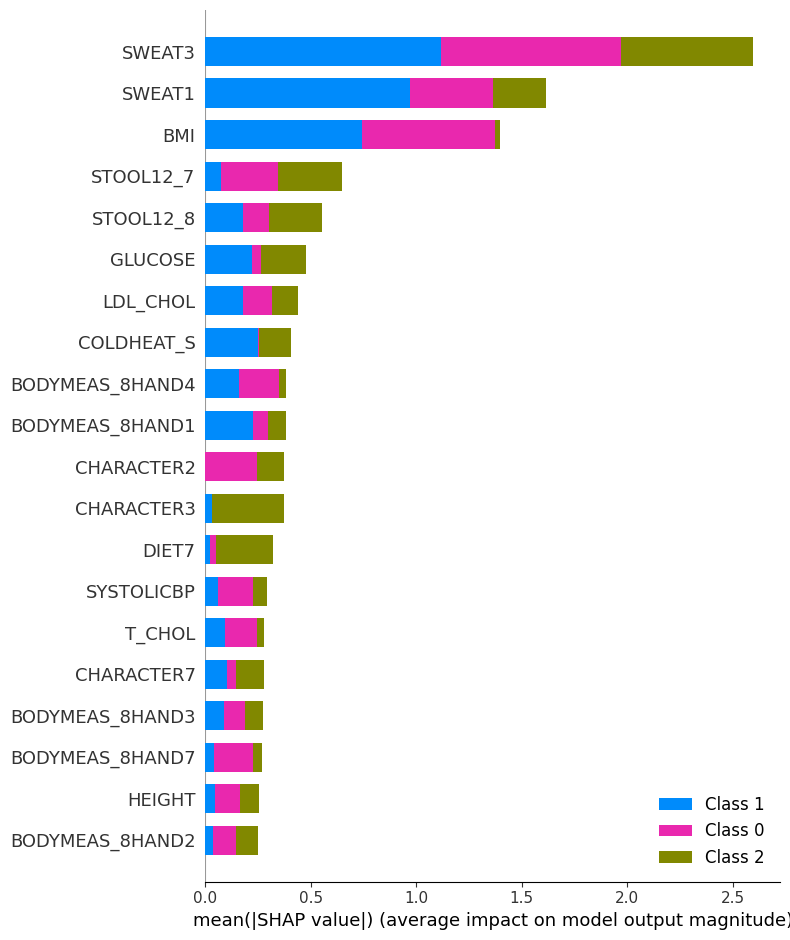

In [64]:
shap.summary_plot(shap_values, X_test)

In [65]:
pd.concat([X_test, pd.DataFrame(y_test), pd.DataFrame(y_pred)], axis=1)

SEX     AGE  JOB  EDUCATION  MARRIAGE  CHARACTER1  CHARACTER2  CHARACTER3  \
0     2  53.844    2          6         2           3           1           1   
1     2  49.173   14          5         2           2           1           1   
2     2  10.008   14          1         1           2           2           2   
3     1  10.422   14          1         1           2           3           2   
4     1  17.685   14          3         1           3           2           3   
..  ...     ...  ...        ...       ...         ...         ...         ...   
95    1  14.184   14          2         1           2           1           2   
96    1  69.153    6          2         2           1           1           1   
97    2  47.808    2          5         2           3           3           2   
98    2  78.663   14          1         2           1           1           1   
99    1  49.581    8          2         2           3           2           3   

    CHARACTER4  CHARACTER5  ...  BODYMEAS_8HAND8  SYSTOLICBP  DIASTOLICBP  \
0            1           3  ...             99.1         120           90   
1            3           3  ...             95.5         130           80   
2            1           1  ...             80.0         118           75   
3            2           3  ...             78.5         110           80   
4            3           3  ...             82.6         140           83   
..         ...         ...  ...              ...         ...          ...   
95           2           2  ...             93.0          94           66   
96           1           3  ...             95.3         142           93   
97           1           3  ...             87.5          90           50   
98           1           1  ...             92.0         140           70   
99           2           2  ...            100.0         129           72   

    GLUCOSE  T_CHOL     TG  HDL_CHOL  LDL_CHOL  FINALDIAGNOSIS  0  
0      92.0   267.0  393.0     40.00     156.0               0  1  
1      88.0   138.0   90.0     39.00      74.0               0  0  
2      86.0   168.0   76.5     63.00      84.0               1  1  
3      83.0   188.0   35.0     80.00      98.0               0  2  
4      87.0   138.0   86.0     39.00      72.0               1  1  
..      ...     ...    ...       ...       ...             ... ..  
95     92.0   148.0   61.0     45.00      86.0               1  2  
96     95.0   176.0  267.0     54.00     103.0               0  2  
97     94.0   215.0   65.0     85.00     112.0               2  2  
98     99.0   165.5  187.0     43.75      91.0               0  0  
99     92.0   186.0   61.0     33.00     118.0               0  0  

[100 rows x 71 columns]